In [1]:
import re
import json
import uuid
import glob
import pickle
import sys
import os
import math
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.cluster import KMeansClusterer, euclidean_distance
from numpy import array
from pprint import pprint
import re
import scipy.stats as stat
from os.path import basename
import string
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import operator
from nltk import stem
from nltk.stem.snowball import *
from nltk.stem import PorterStemmer
import datetime
import time
from pprint import pprint
from gensim.corpora.dictionary import Dictionary

%matplotlib inline

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import os

# Enable logging for gensim - optional
import logging
logging.basicConfig(filename='lda_model_Parenting.log',format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")


def Tokinization(document):
    document = "".join(document)
    tokenizer = RegexpTokenizer(r'\w+')
    intermediate = tokenizer.tokenize(document)
    return intermediate


/Users/tammari/Desktop/DaskTest/env/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [177]:
df= pd.read_pickle('Mizo_LDA_70_Topics.pkl')

In [3]:
#stripping all r/Parenting related columns that are not useful here...
df_text = df[['body', 'clean_body','subreddit','author','created_utc','link_id','name','parent_id','score','Throwaway']]

In [175]:
df_text.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway
0,Great tips.,great tip,Parenting,None,2008-03-31 12:44:58,t3_6e0oe,t1_c03l6im,t3_6e0oe,1,False
1,Now you tell me. :-(,tell :-,Parenting,kickstand,2008-04-09 15:16:05,t3_6d8mw,t1_c03o5z1,t3_6d8mw,1,False
2,"At our house, the tooth fairy leaves one shiny $1 coin with a dead white President's face on it.\n\nhttp://www.usmint.gov/mint_programs/$1coin/index.cfm?flash=yes",hous tooth fairi leav one shini coin dead white presid face usmint gov mint program coin index cfm flash=y,Parenting,kickstand,2008-04-09 15:17:46,t3_6d8mh,t1_c03o5zp,t3_6d8mh,1,False
3,"Whatever you do, don't make reading a chore. It's the most fun thing in the world, treat it as such.",whatev make read chore fun thing world treat,Parenting,kickstand,2008-05-08 19:14:57,t3_6ikpd,t1_c03y7ux,t3_6ikpd,1,False
4,"Formula ""gift"" bags should be illegal.",formula gift bag illeg,Parenting,None,2008-06-23 14:50:48,t3_6okju,t1_c04g7f8,t3_6okju,2,False


In [5]:
#Creating a Daddit Data Frame
Daddit = df_text[df_text['subreddit']=='daddit']

In [6]:
Daddit.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway
1838,&gt;Be silly once a day\n\nI like this. Nice.,silli day like nice,daddit,Hardwarily,2010-07-17 18:51:04,t3_cqp6w,t1_c0uiar1,t3_cqp6w,3,False
1839,Hmm...\n\nDoes that mean I need to scale back ...,hmm mean need scale back silli,daddit,pigferret,2010-07-17 23:20:38,t3_cqp6w,t1_c0uiswa,t1_c0uiar1,5,False
1840,"&gt; *When the boy lucks into a nice move, for...",boy luck nice move exampl take moment offer pr...,daddit,pigferret,2010-07-17 23:34:23,t3_cqoof,t1_c0uitr7,t3_cqoof,1,False
1841,"I do this at least once a day, and much more i...",least day much count unintent,daddit,MrSpaceYeti,2010-07-17 23:37:24,t3_cqp6w,t1_c0uitxs,t1_c0uiswa,3,False
1842,I could probably get it down to once a day if ...,could probabl get day work,daddit,pigferret,2010-07-17 23:42:50,t3_cqp6w,t1_c0uiua3,t1_c0uitxs,2,False


The LDA's are run elswhere on a loop (usually on a server). Below are some of the results...

In [10]:
print('reading the Daddit Cleaned dataframe...')
print('*' * 50)
print('and for a test...')
print(Daddit.clean_body.head())
print('*' * 50)

reading the Daddit Cleaned dataframe...
**************************************************
and for a test...
1037029                                  silli day like nice
1037030                       hmm mean need scale back silli
1037031    boy luck nice move exampl take moment offer pr...
1037032                        least day much count unintent
1037033                           could probabl get day work
Name: clean_body, dtype: object
**************************************************


In [11]:
print('grouping into dcouments')
CompleteThread = []
CompleteThread = Daddit.groupby('link_id')['clean_body'].apply(list)
#running for the rest of the data
processed_threads = []
#creating threads for each of the users
for thread in CompleteThread:
    #Preprocessing each of the threads
    processed_threads.append(Tokinization(thread))

grouping into dcouments


In [12]:
texts = processed_threads
print('The length of the documents is...')
print(len(texts))
print('*' * 50)
print('the first document is...')
print(texts[0])
print('*' * 50)

print('buiding the dictionary...')
dictionary = corpora.Dictionary(texts)
dictionary.save('DadditDictionary.dict')
print(dictionary[0])

print('building the corpus')
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('DadditCorpusFinal.mm', corpus)
print(corpus[0])

The length of the documents is...
44730
**************************************************
the first document is...
['congratul', 'ee', 'goodbeauti', 'babi', 'congrat']
**************************************************
buiding the dictionary...
babi
building the corpus
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [15]:
print('reading all LDA models....')
print('*' * 50)

model_list =  []

coherence_values = []

for i in range(0, len(model_list)):
    print('now working on coherence value for model...')
    print(model_list[i])
    print('*' * 50)
    coherencemodel = CoherenceModel(model=model_list[i], texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

reading all LDA models....
**************************************************


In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
from gensim.models import LdaModel
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=10, limit=100, step=10)

/Users/tammari/Desktop/DaskTest/env/lib/python3.6/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/tammari/Desktop/DaskTest/env/lib/python3.6/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [ ]:
limit = 100
start = 10
step  = 10    

x = range(start, limit, step)
coherence = zip(x, coherence_values)
sorted_coherence = sorted(coherence, key=lambda x: x[1], reverse=True)

print(sorted_coherence)
print('*' * 50)

#for m, cv in sorted_coherence:
#    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
print('saving list...')
print('*' * 50)
with open("daddit_cohere.pkl", "wb") as fp: 
    pickle.dump(sorted_coherence, fp)
    
print('creating a graph of the coherence model...')
print('*' * 50)

# Show graph
fig = plt.gcf()
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("topics")
#plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='left')
fig.savefig('Daddit_LDA_models_coherence.png')

In [20]:
for i in range(0,len(model_list)):
    model_list[i].save('Daddit_Model'+str(i)+".model")

In [5]:
with open('Daddit_cohere.pkl', 'rb') as f:
    coherence_values = pickle.load(f)

In [6]:
coherence_values

[(90, 0.45507055464394863),
 (80, 0.47193974476475054),
 (70, 0.4855468327726064),
 (60, 0.46377945867955206),
 (50, 0.4605282992545867),
 (40, 0.47508608717363676),
 (30, 0.4380515627620837),
 (20, 0.47824322359635907),
 (10, 0.3842091286860035)]

In [30]:
with open("daddit_cohere.pkl", "wb") as fp: 
    pickle.dump(coherence_values, fp)

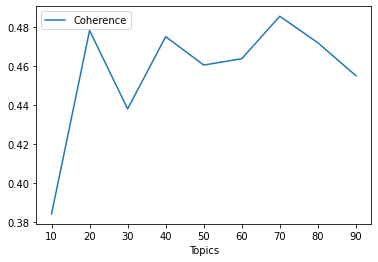

In [7]:
with open('Daddit_cohere.pkl', 'rb') as f:
    coherence_values = pickle.load(f)

df = pd.DataFrame.from_records(coherence_values, columns =['Topics', 'Coherence']) 

df = df.sort_values(by='Topics')

df.plot(x ='Topics', y='Coherence', kind = 'line')
plt.show()

# Finding topic distributions accross df

Choose 60 topics

In [7]:
import pandas as pd
import numpy as np
from gensim import models
from gensim.models.doc2vec import TaggedDocument
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

Final Test for finding dominant topics etc.

In [8]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel

# spacy for lemmatization
#import spacy

# Plotting tools
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pd.reset_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)

import os

In [9]:
def Tokinization(document):
    document = "".join(document)
    tokenizer = RegexpTokenizer(r'\w+')
    intermediate = tokenizer.tokenize(document)

    return intermediate

In [150]:
#load LDA model
from gensim.models import LdaModel
from gensim import corpora, models
from gensim.corpora import Dictionary
optimal_model = LdaModel.load('Daddit_Model3.model')
dictionary = corpora.Dictionary.load('DadditDictionary.dict')
corpus = corpora.MmCorpus('DadditCorpusFinal.mm')

In [152]:
optimal_model.print_topic(11)

'0.047*"sick" + 0.025*"cold" + 0.023*"flu" + 0.023*"nose" + 0.020*"immun" + 0.017*"cough" + 0.012*"fever" + 0.012*"snot" + 0.011*"temperatur" + 0.010*"temp"'

In [153]:
topic_table = pd.DataFrame(optimal_model.show_topics(),columns=['Topic Number','KTG'])

In [154]:
topic_table

,Topic Number,KTG
0,33,"0.079*""cat"" + 0.005*""layout"" + 0.004*""kitten"" + 0.004*""hammock"" + 0.003*""kitti"" + 0.002*""jonathan"" + 0.002*""lookin"" + 0.002*""dw"" + 0.001*""blogspam"" + 0.001*""madison"""
1,9,"0.071*""game"" + 0.043*""play"" + 0.019*""bike"" + 0.017*""paint"" + 0.010*""lego"" + 0.009*""use"" + 0.008*""build"" + 0.008*""get"" + 0.007*""one"" + 0.007*""control"""
2,7,"0.032*""littl"" + 0.027*""look"" + 0.026*""congrat"" + 0.019*""girl"" + 0.018*""man"" + 0.016*""month"" + 0.016*""babi"" + 0.016*""cute"" + 0.015*""like"" + 0.014*""happi"""
3,2,"0.011*""like"" + 0.011*""get"" + 0.009*""use"" + 0.008*""would"" + 0.008*""make"" + 0.008*""one"" + 0.007*""thing"" + 0.006*""want"" + 0.006*""someth"" + 0.006*""think"""
4,38,"0.033*""pool"" + 0.023*""swim"" + 0.012*""water"" + 0.008*""watch"" + 0.007*""old"" + 0.007*""year"" + 0.007*""go"" + 0.007*""movi"" + 0.007*""get"" + 0.006*""time"""
5,26,"0.019*""etsi"" + 0.016*""awd"" + 0.008*""bitti"" + 0.007*""misunderstood"" + 0.007*""meme"" + 0.004*""itti"" + 0.004*""daylook"" + 0.003*""jon"" + 0.003*""daylove"" + 0.003*""beater"""
6,19,"0.015*""wife"" + 0.014*""get"" + 0.014*""time"" + 0.014*""feel"" + 0.012*""thing"" + 0.012*""go"" + 0.010*""like"" + 0.009*""know"" + 0.008*""one"" + 0.008*""make"""
7,39,"0.040*""car"" + 0.037*""seat"" + 0.013*""one"" + 0.012*""stroller"" + 0.011*""use"" + 0.010*""drive"" + 0.009*""get"" + 0.008*""kid"" + 0.008*""back"" + 0.007*""trip"""
8,36,"0.042*""word"" + 0.036*""languag"" + 0.033*""sign"" + 0.025*""talk"" + 0.017*""speak"" + 0.016*""develop"" + 0.015*""speech"" + 0.014*""say"" + 0.012*""start"" + 0.012*""learn"""
9,5,"0.143*""book"" + 0.110*""read"" + 0.010*""stori"" + 0.010*""letter"" + 0.008*""love"" + 0.007*""seri"" + 0.007*""comic"" + 0.006*""librari"" + 0.006*""page"" + 0.006*""one"""


In [155]:
def clean_topic_table(LDA_Model=optimal_model,top_terms=40):

    complete = []
    KTG_list = []

    list_of_topics = [i for i in range(0,optimal_model.num_topics)]

    for i in range (0, optimal_model.num_topics):
        clean_KTG = ", ".join([word for word, prop in optimal_model.show_topic(i,topn=top_terms)])
        KTG_list.append(clean_KTG)

    final_list = list(zip(list_of_topics,KTG_list))
    return pd.DataFrame(final_list, columns=['Topic Number','KTG'])

Testing out the cleaning code

In [156]:
KTG_List = clean_topic_table(LDA_Model=optimal_model,top_terms=40)

In [157]:
KTG_List

,Topic Number,KTG
0,0,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"
1,1,"sleep, night, bed, wake, room, crib, asleep, nap, get, time, go, put, hour, fall, back, bedtim, routin, slept, minut, us, cri, pm, let, one, would, work, co, train, old, morn, like, wife, kid, woke, stay, light, usual, everi, awak, use"
2,2,"like, get, use, would, make, one, thing, want, someth, think, go, also, good, know, tri, need, even, realli, way, kid, peopl, r, look, much, see, work, help, seem, might, could, put, actual, well, time, may, lot, post, find, sure, give"
3,3,"gun, firearm, shoot, mandarin, henri, rifl, spa, premier, handgun, weapon, thumbnail, bode, bb, coup, onelove, dadwow, sentiment, ammo, usyeah, aftercar, hunt, plus, loverealli, pedialit, jewelri, illiter, massag, cgid, fingerprint, safeti, jk, anniversari, furi, pointthink, getaway, get, geronimo, frickin, ownership, dlook"
4,4,"implant, ant, mw, averi, wellgood, korean, contracept, eleanor, mancongrat, franklin, benjamin, elsa, brim, vike, funny, churchil, roo, manni, prouder, ella, bakeri, lat, olli, heirloom, mk, stanley, clark, nixon, ingredients, larva, cowardli, banana, clara, vampir, andi, mj, godfath, boobi, celtic, dna"
5,5,"book, read, stori, letter, love, seri, comic, librari, page, one, great, start, bumbo, favorit, good, word, also, time, get, kid, learn, chapter, write, son, reader, like, moon, age, littl, realli, written, interest, dvd, thing, bear, doo, amazon, goodnight, old, harri"
6,6,"milk, formula, bottl, feed, breast, breastfeed, pump, hair, babi, wife, lactat, nippl, consult, supplement, teeth, use, breastfe, latch, enough, boob, produc, brush, fed, water, breastmilk, also, nurs, get, suppli, allergi, drink, tri, weight, help, tooth, work, oz, mom, much, breastf"
7,7,"littl, look, congrat, girl, man, month, babi, cute, like, happi, great, dad, smile, first, day, love, awesom, one, boy, congratul, beauti, good, old, best, e, enjoy, amaz, thank, born, daughter, birthday, week, guy, dude, ador, year, hair, face, son, hope"
8,8,"babi, get, month, time, sleep, like, first, go, start, cri, one, tri, thing, day, night, work, week, old, hour, wife, take, back, littl, help, would, much, realli, make, around, need, everi, also, good, feed, put, kid, use, still, daughter, better"
9,9,"game, play, bike, paint, lego, use, build, get, one, control, set, ride, train, pedal, piec, balanc, wall, board, wheel, fun, like, xbox, mario, got, learn, look, great, ps, good, player, video, project, box, would, togeth, make, old, kid, wii, also"


In [158]:
KTG_List.to_csv('Daddit_40_topics_KTG.csv')

In [159]:
#First, get a list of posts, one by one
processed_posts = []
CompletePosts = Daddit['clean_body'].apply(list)
#running for the rest of the data
processed_posts = []
#creating threads for each of the users
for post in CompletePosts:
    #Preprocessing each of the threads
    processed_posts.append(Tokinization(post))
       
new_doc2bow = [dictionary.doc2bow(post) for post in processed_posts]
vector = optimal_model.get_document_topics(new_doc2bow)

#create a list of dictioaries for scores relating to optimum LDA
newdictlist = []
for i in range(0, len(vector)):
    newdictlist.append(dict(vector[i]))


topic_bow = pd.DataFrame(newdictlist)

topic_bow.fillna(0, inplace=True)

topic_bow = topic_bow.round(3)

In [160]:
vector[2]

[(7, 0.3572335),
 (28, 0.25357792),
 (30, 0.068240985),
 (36, 0.06343963),
 (37, 0.1991559)]

In [161]:
dict(vector[1])

{2: 0.86048084}

In [162]:
# Get dominant topic for each document
dominant_topic = np.argmax(topic_bow.values, axis=1)
topic_bow['dominant_topic'] = dominant_topic

In [163]:
df_topic_distribution = topic_bow['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df = KTG_List.copy()
df_topic_distribution = df_topic_distribution.join(df['KTG'], on='Topic Num')
df_topic_distribution.head()

,Topic Num,Num Documents,KTG
0,6,70688,"milk, formula, bottl, feed, breast, breastfeed, pump, hair, babi, wife, lactat, nippl, consult, supplement, teeth, use, breastfe, latch, enough, boob, produc, brush, fed, water, breastmilk, also, nurs, get, suppli, allergi, drink, tri, weight, help, tooth, work, oz, mom, much, breastf"
1,13,54974,"lawn, mow, portrait, mower, grass, georgia, dork, lemonad, machineri, reminisc, templat, india, headrest, tutu, holli, moustach, vile, randi, happithank, uhhh, folder, acr, stoop, brad, congratule, freakishli, gatekeep, flatter, jo, lawnmow, mystic, onemake, dylan, sutur, sunburn, preset, lifeyeah, trouser, oregon, loveyeah"
2,0,51849,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"
3,8,47466,"babi, get, month, time, sleep, like, first, go, start, cri, one, tri, thing, day, night, work, week, old, hour, wife, take, back, littl, help, would, much, realli, make, around, need, everi, also, good, feed, put, kid, use, still, daughter, better"
4,19,36654,"wife, get, time, feel, thing, go, like, know, one, make, help, first, realli, want, need, good, life, babi, much, take, love, think, day, year, kid, even, dad, way, month, best, tri, better, littl, talk, would, work, come, famili, say, lot"


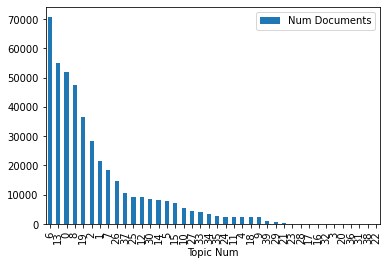

In [164]:
df_topic_distribution.plot.bar(x='Topic Num')

In [39]:
# Styling
#this takes a long time becuase it has to track every row...that is why it is limited to 15 rows...
def color_green(val):
    color = 'blue' if val > .9 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .9 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
#limit to 15 rows
topic_bow_styled = topic_bow.head(15).style.applymap(color_green).applymap(make_bold)
topic_bow_styled

,9,31,51,56,21,34,40,36,43,19,27,30,47,50,45,57,58,39,48,35,1,32,5,4,25,0,17,8,42,18,38,22,24,29,33,44,16,49,10,2,3,6,7,11,12,13,14,15,20,23,26,28,37,41,46,52,53,54,55,59,dominant_topic
0,0.803000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.582000,0.175000,0.108000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.211000,0.284000,0.000000,0.000000,0.442000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.194000,0.644000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.836000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7
6,0.000000,0.000000,0.000000,0.000000,0.143000,0.000000,0.000000,0.000000,0.769000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8
7,0.00

In [165]:
#leave in place and add the columns together
Daddit.reset_index(drop=True, inplace=True)
topic_bow.reset_index(drop=True, inplace=True)
New_MizoFrame = pd.concat([Daddit, topic_bow], axis=1)

In [166]:
New_MizoFrame.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway,7,2,28,30,36,37,18,21,0,5,9,14,29,19,39,1,3,4,6,8,10,11,12,13,15,16,17,20,22,23,24,25,26,27,31,32,33,34,35,38,dominant_topic
0,&gt;Be silly once a day\n\nI like this. Nice.,silli day like nice,daddit,Hardwarily,2010-07-17 18:51:04,t3_cqp6w,t1_c0uiar1,t3_cqp6w,3,False,0.805,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Hmm...\n\nDoes that mean I need to scale back my silliness?,hmm mean need scale back silli,daddit,pigferret,2010-07-17 23:20:38,t3_cqp6w,t1_c0uiswa,t1_c0uiar1,5,False,0.000,0.860,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!",boy luck nice move exampl take moment offer prais shotgun face truli word live,daddit,pigferret,2010-07-17 23:34:23,t3_cqoof,t1_c0uitr7,t3_cqoof,1,False,0.357,0.000,0.253,0.068,0.063,0.199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,"I do this at least once a day, and much more if you count the unintentionals.",least day much count unintent,daddit,MrSpaceYeti,2010-07-17 23:37:24,t3_cqp6w,t1_c0uitxs,t1_c0uiswa,3,False,0.000,0.325,0.517,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,I could probably get it down to once a day if I work on it.,could probabl get day work,daddit,pigferret,2010-07-17 23:42:50,t3_cqp6w,t1_c0uiua3,t1_c0uitxs,2,False,0.000,0.000,0.837,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [167]:
New_MizoFrame[(New_MizoFrame[16]>0.9) & (New_MizoFrame.body.str.len()>100)].body

5614                                                   good luck! we will all be hoping for the best i am sure.\n\nand i, for one, will put a little something extra in my prayers for you.
8878                                            Yeah, my wife is a nurse, but she's not really a peds nurse, she's in geriatrics. She always goes the doctor rouite, and I don't blame her!
9356                                                                         99 isn't a fever, but the puking is probably not a good thing.  If you're worried go to an urgent care clinic.
17204                                  The doctor that performed the procedure told me that until a few years back they did it without any anaesthetic. Can you imagine the brutality?!\n\n
19623                                                           i went to all my wifes appointments after i found out how horribly bad she was at remembering the doctors instructions.....
                                                            

In [168]:
Mizo_Dominant = New_MizoFrame[['body','dominant_topic']]
df = KTG_List.copy()
df = df.rename(columns={"Topic Number": "dominant_topic"})
Mizo_Dominant = Mizo_Dominant.join(df['KTG'], on='dominant_topic')

In [169]:
Mizo_Dominant[(Mizo_Dominant['dominant_topic']==0) & (Mizo_Dominant['body'].str.len()>100)]

,body,dominant_topic,KTG
2,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!",0,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"
192,"Thanks for joining us, you have good reason to be proud!\n\nI love being a daddy to [this little monkey](http://imgur.com/OcnKh.jpg) :)",0,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"
196,"I'm looking forward to those years. I love my boy too. He has a while before we can dig into some mac and cheese, but we like to make goofy faces at each other.\n\nhttp://imgur.com/NNB2l.jpg\n\nWelcome to daddit!",0,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"
208,"Mine gives me the biggest smile on a warm bowl of m&amp;c and a goofy dad, so I hope it's the same. :)",0,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"
287,"Congrats!\n\nDaddy to a 2.5 year old little girl here, and loving every minute of it.\n\nI don't have any pearls of wisdom to share, just make sure you have a good camera :)",0,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"
...,...,...,...
440508,"I feel ya. My youngest started climbing before walking. Pretty sure she's a monkey.\n\nLook at her though she's so happy. She worked so hard for that. Good job, girl!",0,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"
440572,"It's amazing to see the thought processes, the readjusting, and the persistence that babies have. She is so proud of herself!",0,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"
440615,"That’s good. Enjoy your time with them mate, it goes so quickly. My little boy is 7 months tomorrow, can’t believe how quick it has gone.",0,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"
440652,We had a couple. The one I liked the best was this one [https://www.amazon.com/gp/product/B01DBQHDIQ](https://www.amazon.com/gp/product/B01DBQHDIQ),0,"kid, parent, peopl, like, child, think, would, say, dad, want, know, make, thing, get, father, go, way, children, need, one, see, even, mom, person, time, ask, daughter, right, tell, good, someon, never, famili, men, mean, point, feel, mother, said, son"


Normalizing the scores, so that we can always use 0.9 as the perc...

In [170]:
topic_bow_norm=(topic_bow-topic_bow.mean())/topic_bow.std()

In [171]:
topic_bow_norm['dominant_topic'] = topic_bow_norm.idxmax(axis=1)

In [172]:
#leave in place and add the columns together
Daddit.reset_index(drop=True, inplace=True)
topic_bow_norm.reset_index(drop=True, inplace=True)
New_MizoFrame_norm = pd.concat([Daddit, topic_bow_norm], axis=1)

In [173]:
New_MizoFrame_norm.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway,7,2,28,30,36,37,18,21,0,5,9,14,29,19,39,1,3,4,6,8,10,11,12,13,15,16,17,20,22,23,24,25,26,27,31,32,33,34,35,38,dominant_topic
0,&gt;Be silly once a day\n\nI like this. Nice.,silli day like nice,daddit,Hardwarily,2010-07-17 18:51:04,t3_cqp6w,t1_c0uiar1,t3_cqp6w,3,False,3.520772,-0.308109,-0.344026,-0.113914,-0.170137,-0.218162,-0.503734,-0.287525,-0.429764,-0.168856,-0.20522,-0.149351,-0.22407,-0.436062,-0.213248,-0.234858,-0.113133,-0.109772,-0.169884,-0.35458,-0.111352,-0.130026,-0.146092,-0.109326,-0.173291,-0.224078,-0.256512,-0.173598,-0.108363,-0.123022,-0.216402,-0.150162,-0.106374,-0.183071,-0.17386,-0.167051,-0.113178,-0.231786,-0.169851,-0.130891,7
1,Hmm...\n\nDoes that mean I need to scale back my silliness?,hmm mean need scale back silli,daddit,pigferret,2010-07-17 23:20:38,t3_cqp6w,t1_c0uiswa,t1_c0uiar1,5,False,-0.453782,5.872262,-0.344026,-0.113914,-0.170137,-0.218162,-0.503734,-0.287525,-0.429764,-0.168856,-0.20522,-0.149351,-0.22407,-0.436062,-0.213248,-0.234858,-0.113133,-0.109772,-0.169884,-0.35458,-0.111352,-0.130026,-0.146092,-0.109326,-0.173291,-0.224078,-0.256512,-0.173598,-0.108363,-0.123022,-0.216402,-0.150162,-0.106374,-0.183071,-0.17386,-0.167051,-0.113178,-0.231786,-0.169851,-0.130891,2
2,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!",boy luck nice move exampl take moment offer prais shotgun face truli word live,daddit,pigferret,2010-07-17 23:34:23,t3_cqoof,t1_c0uitr7,t3_cqoof,1,False,1.308847,-0.308109,1.223106,9.332727,1.059828,2.062624,-0.503734,-0.287525,-0.429764,-0.168856,-0.20522,-0.149351,-0.22407,-0.436062,-0.213248,-0.234858,-0.113133,-0.109772,-0.169884,-0.35458,-0.111352,-0.130026,-0.146092,-0.109326,-0.173291,-0.224078,-0.256512,-0.173598,-0.108363,-0.123022,-0.216402,-0.150162,-0.106374,-0.183071,-0.17386,-0.167051,-0.113178,-0.231786,-0.169851,-0.130891,30
3,"I do this at least once a day, and much more if you count the unintentionals.",least day much count unintent,daddit,MrSpaceYeti,2010-07-17 23:37:24,t3_cqp6w,t1_c0uitxs,t1_c0uiswa,3,False,-0.453782,2.027496,2.858374,-0.113914,-0.170137,-0.218162,-0.503734,-0.287525,-0.429764,-0.168856,-0.20522,-0.149351,-0.22407,-0.436062,-0.213248,-0.234858,-0.113133,-0.109772,-0.169884,-0.35458,-0.111352,-0.130026,-0.146092,-0.109326,-0.173291,-0.224078,-0.256512,-0.173598,-0.108363,-0.123022,-0.216402,-0.150162,-0.106374,-0.183071,-0.17386,-0.167051,-0.113178,-0.231786,-0.169851,-0.130891,28
4,I could probably get it down to once a day if I work on it.,could probabl get day work,daddit,pigferret,2010-07-17 23:42:50,t3_cqp6w,t1_c0uiua3,t1_c0uitxs,2,False,-0.453782,-0.308109,4.840518,-0.113914,-0.170137,-0.218162,-0.503734,-0.287525,-0.429764,-0.168856,-0.20522,-0.149351,-0.22407,-0.436062,-0.213248,-0.234858,-0.113133,-0.109772,-0.169884,-0.35458,-0.111352,-0.130026,-0.146092,-0.109326,-0.173291,-0.224078,-0.256512,-0.173598,-0.108363,-0.123022,-0.216402,-0.150162,-0.106374,-0.183071,-0.17386,-0.167051,-0.113178,-0.231786,-0.169851,-0.130891,28


In [174]:
New_MizoFrame_norm[(New_MizoFrame_norm[22]>1) & (New_MizoFrame_norm.body.str.len()>200) & (New_MizoFrame_norm.body.str.contains('halloween'))].body

171921    FYI, dude in the picture is [MrSpite](http://www.reddit.com/user/MrSpite).\n\nHe'd written about this for [Good Men Project](http://goodmenproject.com/families/tmb-whats-dad-daughter-wants-dress-han-solo/), and then the article basically went everywhere, from [TIME](http://time.com/3534577/halloween-costume-male-female-equality/) to [HuffPo](http://www.huffingtonpost.com/tom-m-burns/whats-a-dad-to-do-when-his-daughter-wants-to-dress-up-as-han-solo-for-halloween_b_6044124.html) and the pic even showed up on the [TODAY Show](http://www.today.com/parents/dad-has-awesome-response-his-daughter-dressing-han-solo-1D80248549).\n\nAnd yes, I'm his publicist. Just kidding...I'm his friend.
Name: body, dtype: object

In [65]:
#leave in place and add the columns together
Mizo_Dominant_norm = New_MizoFrame[['body','dominant_topic']]
df = KTG_List.copy()
df = df.rename(columns={"Topic Number": "dominant_topic"})
Mizo_Dominant_norm = Mizo_Dominant_norm.join(df['KTG'], on='dominant_topic')

In [67]:
Mizo_Dominant_norm.head()

,body,dominant_topic,KTG
0,&gt;Be silly once a day\n\nI like this. Nice.,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
1,Hmm...\n\nDoes that mean I need to scale back my silliness?,1,"pictur, photo, look, phone, pic, video, camera, like, great, old, one, year, take, month, get, littl, nice, love, christma, shot, got, frame, email, son, photograph, day, awesom, print, first, use, good, see, realli, cute, time, babi, iphon, amaz, daughter, go"
2,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!",4,"daddi, da, glass, brand, mommi, huggi, say, pamper, mama, costco, dada, sunglass, peppa, gerber, onsi, sunscreen, target, fireplac, momma, kirkland, tm, said, bye, daughter, cucumb, tree, like, mummi, heartwarm, ti, first, one, sam, get, call, coars, tongue, coupon, hound, month"
3,"I do this at least once a day, and much more if you count the unintentionals.",6,"star, war, ha, trek, luke, hahaha, jedi, alic, lili, rebel, evil, solar, faggot, font, moustach, autocorrect, iv, smurf, yall, tng, emperor, ep, machet, menac, rightthink, waygood, gramma, comed, chewbacca, myself, longev, nerd, anakin, gold, likeget, order, cthulhu, geniu, indiana, sparkli"
4,I could probably get it down to once a day if I work on it.,6,"star, war, ha, trek, luke, hahaha, jedi, alic, lili, rebel, evil, solar, faggot, font, moustach, autocorrect, iv, smurf, yall, tng, emperor, ep, machet, menac, rightthink, waygood, gramma, comed, chewbacca, myself, longev, nerd, anakin, gold, likeget, order, cthulhu, geniu, indiana, sparkli"


Trying Dominant topics after normalization...

In [68]:
df_topic_distribution_norm = topic_bow_norm['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution_norm.columns = ['Topic Num', 'Num Documents']
df = KTG_List.copy()
df_topic_distribution_norm = df_topic_distribution_norm.join(df['KTG'], on='Topic Num')
df_topic_distribution_norm.head()

,Topic Num,Num Documents,KTG
0,31,26979,"kid, like, parent, get, think, go, want, thing, peopl, know, would, make, say, child, time, way, need, one, someth, tri, even, realli, see, feel, good, tell, take, let, work, talk, ask, give, children, come, wife, person, said, also, never, much"
1,36,22036,"year, kid, old, like, get, time, one, daughter, love, littl, son, dad, look, go, month, thing, good, got, day, think, make, much, first, realli, see, want, still, would, know, start, great, say, two, boy, girl, way, never, age, take, around"
2,17,17485,"first, month, one, time, wife, babi, week, get, go, feel, day, thing, good, best, life, pregnanc, born, littl, know, pregnant, realli, twin, like, much, make, luck, second, two, everi, man, still, got, sure, year, enjoy, us, congrat, worri, new, lot"
3,30,17228,"babi, get, feel, help, thing, time, like, wife, need, go, take, make, tri, realli, better, month, much, first, know, talk, start, way, even, chang, think, want, lot, also, good, sleep, cri, one, work, hard, littl, stress, someth, give, advic, depress"
4,43,16655,"post, r, like, pictur, reddit, daddit, dad, look, pic, see, thank, comment, sub, subreddit, link, cute, downvot, share, good, kid, babi, upvot, peopl, one, facebook, get, photo, think, thought, pleas, guy, awesom, vote, blog, great, new, op, ment, make, thread"


In [91]:
df_topic_distribution_norm.head(15)

,Topic Num,Num Documents,KTG
0,31,26979,"kid, like, parent, get, think, go, want, thing, peopl, know, would, make, say, child, time, way, need, one, someth, tri, even, realli, see, feel, good, tell, take, let, work, talk, ask, give, children, come, wife, person, said, also, never, much"
1,36,22036,"year, kid, old, like, get, time, one, daughter, love, littl, son, dad, look, go, month, thing, good, got, day, think, make, much, first, realli, see, want, still, would, know, start, great, say, two, boy, girl, way, never, age, take, around"
2,17,17485,"first, month, one, time, wife, babi, week, get, go, feel, day, thing, good, best, life, pregnanc, born, littl, know, pregnant, realli, twin, like, much, make, luck, second, two, everi, man, still, got, sure, year, enjoy, us, congrat, worri, new, lot"
3,30,17228,"babi, get, feel, help, thing, time, like, wife, need, go, take, make, tri, realli, better, month, much, first, know, talk, start, way, even, chang, think, want, lot, also, good, sleep, cri, one, work, hard, littl, stress, someth, give, advic, depress"
4,43,16655,"post, r, like, pictur, reddit, daddit, dad, look, pic, see, thank, comment, sub, subreddit, link, cute, downvot, share, good, kid, babi, upvot, peopl, one, facebook, get, photo, think, thought, pleas, guy, awesom, vote, blog, great, new, op, ment, make, thread"
5,21,16182,"hope, know, feel, sorri, go, famili, pain, wife, man, get, strong, heart, help, loss, imagin, like, wish, time, son, littl, need, best, one, even, thank, love, day, would, keep, us, hear, life, thought, good, thing, make, take, guy, stay, right"
6,9,16040,"girl, boy, littl, cute, congrat, look, like, daughter, dress, shirt, babi, birthday, man, love, ador, beauti, one, happi, wear, pink, gender, cake, awesom, parti, son, congratul, cloth, outfit, oh, dad, hat, got, day, doll, haha, blue, say, kid, great, color"
7,40,15240,"work, time, day, get, home, wife, week, take, go, month, job, stay, leav, hour, daycar, need, care, first, much, thing, help, back, kid, one, babi, like, make, start, hous, spend, famili, realli, would, two, feel, come, even, everi, also, lot"
8,35,12673,"face, like, laugh, look, eye, hand, old, littl, daughter, month, son, one, head, get, mouth, finger, start, thing, kid, nose, time, babi, tri, make, love, funni, got, grab, think, ball, cute, would, put, say, hilari, go, feet, see, around, still"
9,44,12307,"sleep, cri, bed, get, night, time, month, back, babi, asleep, room, put, go, like, fall, old, would, minut, crib, one, wake, first, start, still, tri, let, work, kid, scream, wife, thing, littl, daughter, us, everi, son, around, week, realli, nois"


Renaming columns...

In [8]:
body_list = Daddit[Daddit.body.str.contains(r'(?:\s|^)mee(?:\s|$)')].body

In [10]:
abbr = 'NFL'

item = abbr + '$' 

Daddit[Daddit['body'].str.match(item)]

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,gilded,link_id,name,parent_id,removal_reason,score,score_hidden,subreddit,ups,Throwaway_User,Throwaway_Body,Throwaway,clean_body,Picky_Eaters,Sleep_Training,Nursing,Dad_Support,Parenting_Jokes,Topic_5,Smoke_Drugs_Alcohol,Topic_7,College,Grandparents,Naked_Privacy,Allergy_Sick_Runny_Nose,Child_Food,Parenting_Groups_Religious,Father_Role,Toys_Playing,Diapers,Topic_17,After_First_Child,Child_Activity,Baby_Gear,Psych_Stress,Parent_Gear,Child_Autonomy_Str_Danger,Circumcision,Hair_Care,Vaccines,Teen_Changes,BabyProof_Accidents,Swimming,Moderator,School,Male_Norms,Birth,Joke,Dogs,Diagnosing_Disorders,Cost_Financial_Planning,Topic_38,Topic_39,Children_Socializing,Santa,Work_Parenting_Schedule,Topic_43,Religious_Social_Beleifs,CPS_Child_Abuse,Bathtime_Sleep_Routine,Media,Tantrum_Mngmnt_Discipline,Topic 49,Topic 50,Topic 51,Puppy,Topic_53,Parenting_Pregnany_Hardships_Experiences,Potty_Training,Language_Reading,Music,Edu_Phil,Congrats,Challenging_Behavior,Managing_Grief_Unexpected_Pregnancy,Doors_Child Accidents,Topic_63,Family_Car,Bully,Thanks_Support,Parenting_Nature,Skin_Care_Cloth,Child_Support_CPS


In [143]:
#renaming columns after discovering the nature of topics
column_indices = topic_bow.columns
new_names = ['Topic_'+ str(i) for i in optimal_model.num_topics]
old_names = topic_bow[column_indices]
topic_bow.rename(columns=dict(zip(old_names, new_names)), inplace=True)

TypeError: 'int' object is not iterable

Testing the 60 topic LDA

In [129]:
#load LDA model
from gensim.models import LdaModel
from gensim import corpora, models
from gensim.corpora import Dictionary
optimal_model = LdaModel.load('Daddit_Model5.model')
dictionary = corpora.Dictionary.load('DadditDictionary.dict')
corpus = corpora.MmCorpus('DadditCorpusFinal.mm')

In [11]:
optimal_model.print_topic(11)

'0.020*"carter" + 0.014*"sour" + 0.013*"mcdonald" + 0.008*"ronald" + 0.007*"gari" + 0.007*"congratulcongrat" + 0.005*"cpap" + 0.005*"brad" + 0.004*"nicu" + 0.002*"usyeah"'

In [12]:
topic_table = pd.DataFrame(optimal_model.show_topics(),columns=['Topic Number','KTG'])

In [13]:
topic_table

,Topic Number,KTG
0,40,"0.036*""work"" + 0.033*""time"" + 0.026*""day"" + 0.025*""get"" + 0.024*""home"" + 0.020*""wife"" + 0.018*""week"" + 0.013*""take"" + 0.013*""go"" + 0.012*""month"""
1,33,"0.058*""sleep"" + 0.043*""night"" + 0.028*""hour"" + 0.026*""get"" + 0.019*""time"" + 0.016*""day"" + 0.014*""wake"" + 0.013*""go"" + 0.012*""nap"" + 0.012*""month"""
2,56,"0.036*""shark"" + 0.018*""sandal"" + 0.017*""korean"" + 0.013*""skate"" + 0.010*""boot"" + 0.009*""snow"" + 0.008*""wellgood"" + 0.008*""gopro"" + 0.007*""beta"" + 0.006*""bib"""
3,9,"0.062*""girl"" + 0.037*""boy"" + 0.028*""littl"" + 0.023*""cute"" + 0.022*""congrat"" + 0.022*""look"" + 0.019*""like"" + 0.018*""daughter"" + 0.017*""dress"" + 0.016*""shirt"""
4,50,"0.069*""watch"" + 0.038*""show"" + 0.031*""tv"" + 0.030*""movi"" + 0.012*""kid"" + 0.012*""episod"" + 0.012*""love"" + 0.009*""like"" + 0.009*""youtub"" + 0.008*""disney"""
5,19,"0.075*""book"" + 0.065*""read"" + 0.025*""word"" + 0.017*""languag"" + 0.017*""sign"" + 0.014*""talk"" + 0.013*""start"" + 0.011*""learn"" + 0.011*""say"" + 0.009*""speak"""
6,39,"0.173*""name"" + 0.020*""like"" + 0.017*""middl"" + 0.014*""call"" + 0.013*""first"" + 0.011*""son"" + 0.009*""wife"" + 0.009*""spell"" + 0.008*""one"" + 0.008*""pick"""
7,36,"0.021*""year"" + 0.018*""kid"" + 0.018*""old"" + 0.016*""like"" + 0.014*""get"" + 0.012*""time"" + 0.012*""one"" + 0.011*""daughter"" + 0.010*""love"" + 0.009*""littl"""
8,59,"0.060*""tattoo"" + 0.015*""dope"" + 0.014*""sahp"" + 0.008*""gel"" + 0.007*""comedian"" + 0.006*""copyright"" + 0.006*""wa"" + 0.006*""smoosh"" + 0.004*""gateway"" + 0.004*""dadgood"""
9,5,"0.237*""imgur"" + 0.146*""jpg"" + 0.010*""forest"" + 0.009*""img"" + 0.006*""introduct"" + 0.005*""vampir"" + 0.005*""alik"" + 0.005*""jpeg"" + 0.004*""audit"" + 0.004*""rugrat"""


In [28]:
def clean_topic_table(LDA_Model=optimal_model,top_terms=40):

    complete = []
    KTG_list = []

    list_of_topics = [i for i in range(0,optimal_model.num_topics)]

    for i in range (0, optimal_model.num_topics):
        clean_KTG = ", ".join([word for word, prop in optimal_model.show_topic(i,topn=top_terms)])
        KTG_list.append(clean_KTG)

    final_list = list(zip(list_of_topics,KTG_list))
    return pd.DataFrame(final_list, columns=['Topic Number','KTG'])

Testing out the cleaning code

In [30]:
KTG_List = clean_topic_table(LDA_Model=optimal_model,top_terms=40)

In [63]:
KTG_List

,Topic Number,KTG
0,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
1,1,"pictur, photo, look, phone, pic, video, camera, like, great, old, one, year, take, month, get, littl, nice, love, christma, shot, got, frame, email, son, photograph, day, awesom, print, first, use, good, see, realli, cute, time, babi, iphon, amaz, daughter, go"
2,2,"car, seat, belt, safeti, rear, carseat, instal, strap, face, use, check, back, safe, drive, accid, front, seatbelt, forward, clip, buckl, driver, fac, base, latch, side, passeng, sit, ride, crash, child, put, one, get, nom, system, booster, tighten, make, safer, fire"
3,3,"vader, shutter, darth, pooh, lightsab, yoda, harri, misogynist, knuckl, potter, hobbit, winni, nova, trilog, photogen, notif, duel, saber, disneyworld, skywalk, adob, replica, onedaughter, timeoh, spam, sw, tolkien, him, jedi, abbi, contrast, skit, stark, viral, novel, anh, flair, jim, stephen, mc"
4,4,"daddi, da, glass, brand, mommi, huggi, say, pamper, mama, costco, dada, sunglass, peppa, gerber, onsi, sunscreen, target, fireplac, momma, kirkland, tm, said, bye, daughter, cucumb, tree, like, mummi, heartwarm, ti, first, one, sam, get, call, coars, tongue, coupon, hound, month"
5,5,"imgur, jpg, forest, img, introduct, vampir, alik, jpeg, audit, rugrat, o, arthur, bonu, uniform, gif, harbour, gratz, q, j, imag, cape, mermaid, f, jpgimgur, lol, crochet, photoshoot, funthank, nolan, n, weekcongrat, p, l, pic, z, c, jpgone, wooki, u, h"
6,6,"star, war, ha, trek, luke, hahaha, jedi, alic, lili, rebel, evil, solar, faggot, font, moustach, autocorrect, iv, smurf, yall, tng, emperor, ep, machet, menac, rightthink, waygood, gramma, comed, chewbacca, myself, longev, nerd, anakin, gold, likeget, order, cthulhu, geniu, indiana, sparkli"
7,7,"song, sing, music, danc, listen, youtub, v, band, rock, album, beatl, lyric, cd, tune, love, bob, lullabi, zelda, playlist, sang, theme, radio, feature, hum, piano, classic, intro, dj, twinkl, favorit, calm, version, na, along, concert, watch, sunshin, sung, tast, simon"
8,8,"babi, bottl, sleep, swaddl, use, get, tri, one, help, work, month, also, blanket, like, feed, teeth, pacifi, crib, would, thing, us, good, first, give, make, cri, need, put, take, keep, seem, time, differ, r, much, reflux, start, go, lot, littl"
9,9,"girl, boy, littl, cute, congrat, look, like, daughter, dress, shirt, babi, birthday, man, love, ador, beauti, one, happi, wear, pink, gender, cake, awesom, parti, son, congratul, cloth, outfit, oh, dad, hat, got, day, doll, haha, blue, say, kid, great, color"


In [93]:
KTG_List.to_csv('Daddit_60_topics_KTG.csv')

In [130]:
#First, get a list of posts, one by one
processed_posts = []
CompletePosts = Daddit['clean_body'].apply(list)
#running for the rest of the data
processed_posts = []
#creating threads for each of the users
for post in CompletePosts:
    #Preprocessing each of the threads
    processed_posts.append(Tokinization(post))
       
new_doc2bow = [dictionary.doc2bow(post) for post in processed_posts]
vector = optimal_model.get_document_topics(new_doc2bow)

#create a list of dictioaries for scores relating to optimum LDA
newdictlist = []
for i in range(0, len(vector)):
    newdictlist.append(dict(vector[i]))


topic_bow = pd.DataFrame(newdictlist)

topic_bow.fillna(0, inplace=True)

topic_bow = topic_bow.round(3)

In [131]:
vector[2]

[(9, 0.21105991), (21, 0.44217956), (31, 0.28340802)]

In [132]:
dict(vector[1])

{32: 0.7078348, 51: 0.15400851}

In [35]:
# Get dominant topic for each document
dominant_topic = np.argmax(topic_bow.values, axis=1)
topic_bow['dominant_topic'] = dominant_topic

In [36]:
df_topic_distribution = topic_bow['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df = KTG_List.copy()
df_topic_distribution = df_topic_distribution.join(df['KTG'], on='Topic Num')
df_topic_distribution.head()

,Topic Num,Num Documents,KTG
0,1,50960,"pictur, photo, look, phone, pic, video, camera, like, great, old, one, year, take, month, get, littl, nice, love, christma, shot, got, frame, email, son, photograph, day, awesom, print, first, use, good, see, realli, cute, time, babi, iphon, amaz, daughter, go"
1,7,38549,"song, sing, music, danc, listen, youtub, v, band, rock, album, beatl, lyric, cd, tune, love, bob, lullabi, zelda, playlist, sang, theme, radio, feature, hum, piano, classic, intro, dj, twinkl, favorit, calm, version, na, along, concert, watch, sunshin, sung, tast, simon"
2,0,28074,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
3,8,22737,"babi, bottl, sleep, swaddl, use, get, tri, one, help, work, month, also, blanket, like, feed, teeth, pacifi, crib, would, thing, us, good, first, give, make, cri, need, put, take, keep, seem, time, differ, r, much, reflux, start, go, lot, littl"
4,26,22378,"cuti, grayson, pose, pollut, hazel, stout, transcrib, banana, stinkin, title, subject, techi, oldlittl, aroundget, nicotin, ingredients, satir, to, crinkl, juici, messag, gimp, faq, transcript, everyeah, reddit, buffalo, statist, link, amp, huckleberri, explan, jpgrealli, creator, feedback, suggest, huck, error, report, mistak"


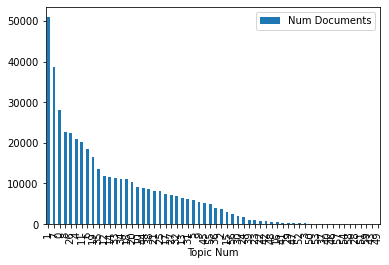

In [37]:
df_topic_distribution.plot.bar(x='Topic Num')

In [39]:
# Styling
#this takes a long time becuase it has to track every row...that is why it is limited to 15 rows...
def color_green(val):
    color = 'blue' if val > .9 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .9 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
#limit to 15 rows
topic_bow_styled = topic_bow.head(15).style.applymap(color_green).applymap(make_bold)
topic_bow_styled

,9,31,51,56,21,34,40,36,43,19,27,30,47,50,45,57,58,39,48,35,1,32,5,4,25,0,17,8,42,18,38,22,24,29,33,44,16,49,10,2,3,6,7,11,12,13,14,15,20,23,26,28,37,41,46,52,53,54,55,59,dominant_topic
0,0.803000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.582000,0.175000,0.108000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.211000,0.284000,0.000000,0.000000,0.442000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.194000,0.644000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.836000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7
6,0.000000,0.000000,0.000000,0.000000,0.143000,0.000000,0.000000,0.000000,0.769000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8
7,0.00

In [133]:
#leave in place and add the columns together
Daddit.reset_index(drop=True, inplace=True)
topic_bow.reset_index(drop=True, inplace=True)
New_MizoFrame = pd.concat([Daddit, topic_bow], axis=1)

In [134]:
New_MizoFrame.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway,9,31,51,21,34,40,36,17,43,19,27,47,50,45,57,58,39,48,35,1,32,5,4,25,30,0,8,42,18,38,22,24,29,33,16,49,28,2,3,6,7,10,11,12,13,14,15,20,23,26,37,41,44,46,52,53,54,55,56,59
0,&gt;Be silly once a day\n\nI like this. Nice.,silli day like nice,daddit,Hardwarily,2010-07-17 18:51:04,t3_cqp6w,t1_c0uiar1,t3_cqp6w,3,False,0.803,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hmm...\n\nDoes that mean I need to scale back my silliness?,hmm mean need scale back silli,daddit,pigferret,2010-07-17 23:20:38,t3_cqp6w,t1_c0uiswa,t1_c0uiar1,5,False,0.000,0.625,0.237,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!",boy luck nice move exampl take moment offer prais shotgun face truli word live,daddit,pigferret,2010-07-17 23:34:23,t3_cqoof,t1_c0uitr7,t3_cqoof,1,False,0.211,0.284,0.000,0.442,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"I do this at least once a day, and much more if you count the unintentionals.",least day much count unintent,daddit,MrSpaceYeti,2010-07-17 23:37:24,t3_cqp6w,t1_c0uitxs,t1_c0uiswa,3,False,0.000,0.000,0.000,0.000,0.195,0.644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,I could probably get it down to once a day if I work on it.,could probabl get day work,daddit,pigferret,2010-07-17 23:42:50,t3_cqp6w,t1_c0uiua3,t1_c0uitxs,2,False,0.000,0.000,0.000,0.000,0.000,0.836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
New_MizoFrame[(New_MizoFrame[16]>0.9) & (New_MizoFrame.body.str.len()>100)].body

4740                                                                                                     I will just throw this out there -- you might consider using cloth diapers, too.  We have a bunch but our baby is not big enough for them just yet.
53314                                                                                                                                            Are baby changing rooms not separate from the toilets - either in the disabled toilet or a room on its own?
63443                                                                                                                      ...but you've had to hand wash the shit out of the cloth diaper every single time.  I'll take the random poopexplosion over that!
73613                                                                                                                         Floor, always. \n\nEven if there are changing tables. Throw a blanket down and change the kid. It's a baby, and no 

In [45]:
Mizo_Dominant = New_MizoFrame[['body','dominant_topic']]
df = KTG_List.copy()
df = df.rename(columns={"Topic Number": "dominant_topic"})
Mizo_Dominant = Mizo_Dominant.join(df['KTG'], on='dominant_topic')

In [46]:
Mizo_Dominant[(Mizo_Dominant['dominant_topic']==0) & (Mizo_Dominant['body'].str.len()>100)]

,body,dominant_topic,KTG
327,Congrats dude. I have a 3 1/2yo daughter and a 5mo son. Read *Father To Daughter* by Harry Harrison Jr. It's got great little bits of wisdom for you. I love that book. \n\nEDIT: typo.,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
418,Oh man! those 3d ultrasounds make the baby look like han solo frozen in carbonite only covered in slime and boogers.,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
602,Congrats! \r\n\r\nI have one of each. The only difference with a girl is that you have to remember to wipe from front to back.,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
1053,I like to hold my kids like I did when they were babies and marvel at how huge they are now.\n\nIt's a happy/sad thing.,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
1222,"Waiting in checkout line, man waiting behind us is Hispanic. My son, 3-4 at the time, shouts, ""That man looks like George Lopez!""",0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
...,...,...,...
439809,Lol I hope my daughter loves hockey. Would be awesome to go to some sabres games when she gets a little bigger,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
439934,You are in trouble with that one! I’ve got one with blue eyes and blond hair. When she looks up at you and says “oh daddy” your heart just melts.,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
440219,I thought that until we recently had our second and our hospital had pink and blue ducks on the blankets.,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
440342,I didn’t think I’d see a kid who I’d find more adorable and beautiful than my own. But there it is... what a friggin cute kid!! That’s some good genes right there.,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"


Normalizing the scores, so that we can always use 0.9 as the perc...

In [135]:
topic_bow_norm=(topic_bow-topic_bow.mean())/topic_bow.std()

In [136]:
topic_bow_norm['dominant_topic'] = topic_bow_norm.idxmax(axis=1)

In [137]:
#leave in place and add the columns together
Daddit.reset_index(drop=True, inplace=True)
topic_bow_norm.reset_index(drop=True, inplace=True)
New_MizoFrame_norm = pd.concat([Daddit, topic_bow_norm], axis=1)

In [138]:
New_MizoFrame_norm.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway,9,31,51,21,34,40,36,17,43,19,27,47,50,45,57,58,39,48,35,1,32,5,4,25,30,0,8,42,18,38,22,24,29,33,16,49,28,2,3,6,7,10,11,12,13,14,15,20,23,26,37,41,44,46,52,53,54,55,56,59,dominant_topic
0,&gt;Be silly once a day\n\nI like this. Nice.,silli day like nice,daddit,Hardwarily,2010-07-17 18:51:04,t3_cqp6w,t1_c0uiar1,t3_cqp6w,3,False,5.295567,-0.417009,-0.158679,-0.283390,-0.205451,-0.280286,-0.361459,-0.280379,-0.293638,-0.197478,-0.202993,-0.234295,-0.200614,-0.217221,-0.143358,-0.103581,-0.184764,-0.238036,-0.266869,-0.213099,-0.200144,-0.091163,-0.123117,-0.152961,-0.278856,-0.197331,-0.178293,-0.064272,-0.092378,-0.136997,-0.187184,-0.199731,-0.212509,-0.225819,-0.172132,-0.063601,-0.077629,-0.11885,-0.063558,-0.091539,-0.120219,-0.207923,-0.057453,-0.226532,-0.183924,-0.065098,-0.089882,-0.114249,-0.057339,-0.059362,-0.097367,-0.075353,-0.228579,-0.074715,-0.170248,-0.129747,-0.071974,-0.064732,-0.073157,-0.060372,9
1,Hmm...\n\nDoes that mean I need to scale back my silliness?,hmm mean need scale back silli,daddit,pigferret,2010-07-17 23:20:38,t3_cqp6w,t1_c0uiswa,t1_c0uiar1,5,False,-0.318275,2.612862,3.751010,-0.283390,-0.205451,-0.280286,-0.361459,-0.280379,-0.293638,-0.197478,-0.202993,-0.234295,-0.200614,-0.217221,-0.143358,-0.103581,-0.184764,-0.238036,-0.266869,-0.213099,-0.200144,-0.091163,-0.123117,-0.152961,-0.278856,-0.197331,-0.178293,-0.064272,-0.092378,-0.136997,-0.187184,-0.199731,-0.212509,-0.225819,-0.172132,-0.063601,-0.077629,-0.11885,-0.063558,-0.091539,-0.120219,-0.207923,-0.057453,-0.226532,-0.183924,-0.065098,-0.089882,-0.114249,-0.057339,-0.059362,-0.097367,-0.075353,-0.228579,-0.074715,-0.170248,-0.129747,-0.071974,-0.064732,-0.073157,-0.060372,51
2,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!",boy luck nice move exampl take moment offer prais shotgun face truli word live,daddit,pigferret,2010-07-17 23:34:23,t3_cqoof,t1_c0uitr7,t3_cqoof,1,False,1.156844,0.959764,-0.158679,2.821446,-0.205451,-0.280286,-0.361459,-0.280379,-0.293638,-0.197478,-0.202993,-0.234295,-0.200614,-0.217221,-0.143358,-0.103581,-0.184764,-0.238036,-0.266869,-0.213099,-0.200144,-0.091163,-0.123117,-0.152961,-0.278856,-0.197331,-0.178293,-0.064272,-0.092378,-0.136997,-0.187184,-0.199731,-0.212509,-0.225819,-0.172132,-0.063601,-0.077629,-0.11885,-0.063558,-0.091539,-0.120219,-0.207923,-0.057453,-0.226532,-0.183924,-0.065098,-0.089882,-0.114249,-0.057339,-0.059362,-0.097367,-0.075353,-0.228579,-0.074715,-0.170248,-0.129747,-0.071974,-0.064732,-0.073157,-0.060372,21
3,"I do this at least once a day, and much more if you count the unintentionals.",least day much count unintent,daddit,MrSpaceYeti,2010-07-17 23:37:24,t3_cqp6w,t1_c0uitxs,t1_c0uiswa,3,False,-0.318275,-0.417009,-0.158679,-0.283390,2.551576,4.767922,-0.361459,-0.280379,-0.293638,-0.197478,-0.202993,-0.234295,-0.200614,-0.217221,-0.143358,-0.103581,-0.184764,-0.238036,-0.266869,-0.213099,-0.200144,-0.091163,-0.123117,-0.152961,-0.278856,-0.197331,-0.178293,-0.064272,-0.092378,-0.136997,-0.187184,-0.199731,-0.212509,-0.225819,-0.172132,-0.063601,-0.077629,-0.11885,-0.063558,-0.091539,-0.120219,-0.207923,-0.057453,-0.226532,-0.183924,-0.065098,-0.089882,-0.114249,-0.057339,-0.059362,-0.097367,-0.075353,-0.228579,-0.074715,-0.170248,-0.129747,-0.071974,-0.064732,-0.073157,-0.060372,40
4,I could probably get it down to once a day if I work on it.,could probabl get day work,daddit,pigferret,2010-07-17 23:42:50,t3_cqp6w,t1_c0uiua3,t1_c0uitxs,2,False,-0.318275,-0.417009,-0.158679,-0.283390,-0.205451,6.272977,-0.361459,-0.280379,-0.293638,-0.197478,-0.202993,-0.234295,-0.200614,-0.217221,-0.143358,-0.103581,-0.184764,-0.238036,-0.266869,-0.213099,-0.200144,-0.091163,-0.123117,-0.152961,-0.278856,-0.197331,-0.178293,-0.064272,-0.092378,-0.136997,-0.187184,-0.199731,-0.212509,-0.225819,-0.172132,-0.0636

In [148]:
New_MizoFrame_norm[(New_MizoFrame_norm[22]>1) & (New_MizoFrame_norm.body.str.len()>200) & (New_MizoFrame_norm.body.str.contains('halloween'))].body

17586                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                As sad as it is, I think my twins are going to end up wearing "My first halloween" outfits for ... well ... their first halloween. I tried to hard to think of some cool twin gimmick and everything required work that I never found the time to do. Maybe I can score something at Carter's.\n\n\nI understand that I wasn't talking directly to anyone but myself and this post has become something of a note-to-self. But, ala

In [65]:
#leave in place and add the columns together
Mizo_Dominant_norm = New_MizoFrame[['body','dominant_topic']]
df = KTG_List.copy()
df = df.rename(columns={"Topic Number": "dominant_topic"})
Mizo_Dominant_norm = Mizo_Dominant_norm.join(df['KTG'], on='dominant_topic')

In [67]:
Mizo_Dominant_norm.head()

,body,dominant_topic,KTG
0,&gt;Be silly once a day\n\nI like this. Nice.,0,"eat, food, like, make, cook, get, meal, kid, thing, chees, tri, dinner, one, good, egg, want, fruit, chicken, give, veggi, peanut, love, go, meat, time, tast, littl, put, also, breakfast, plate, someth, start, much, day, anyth, would, butter, appl, rice"
1,Hmm...\n\nDoes that mean I need to scale back my silliness?,1,"pictur, photo, look, phone, pic, video, camera, like, great, old, one, year, take, month, get, littl, nice, love, christma, shot, got, frame, email, son, photograph, day, awesom, print, first, use, good, see, realli, cute, time, babi, iphon, amaz, daughter, go"
2,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!",4,"daddi, da, glass, brand, mommi, huggi, say, pamper, mama, costco, dada, sunglass, peppa, gerber, onsi, sunscreen, target, fireplac, momma, kirkland, tm, said, bye, daughter, cucumb, tree, like, mummi, heartwarm, ti, first, one, sam, get, call, coars, tongue, coupon, hound, month"
3,"I do this at least once a day, and much more if you count the unintentionals.",6,"star, war, ha, trek, luke, hahaha, jedi, alic, lili, rebel, evil, solar, faggot, font, moustach, autocorrect, iv, smurf, yall, tng, emperor, ep, machet, menac, rightthink, waygood, gramma, comed, chewbacca, myself, longev, nerd, anakin, gold, likeget, order, cthulhu, geniu, indiana, sparkli"
4,I could probably get it down to once a day if I work on it.,6,"star, war, ha, trek, luke, hahaha, jedi, alic, lili, rebel, evil, solar, faggot, font, moustach, autocorrect, iv, smurf, yall, tng, emperor, ep, machet, menac, rightthink, waygood, gramma, comed, chewbacca, myself, longev, nerd, anakin, gold, likeget, order, cthulhu, geniu, indiana, sparkli"


Trying Dominant topics after normalization...

In [68]:
df_topic_distribution_norm = topic_bow_norm['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution_norm.columns = ['Topic Num', 'Num Documents']
df = KTG_List.copy()
df_topic_distribution_norm = df_topic_distribution_norm.join(df['KTG'], on='Topic Num')
df_topic_distribution_norm.head()

,Topic Num,Num Documents,KTG
0,31,26979,"kid, like, parent, get, think, go, want, thing, peopl, know, would, make, say, child, time, way, need, one, someth, tri, even, realli, see, feel, good, tell, take, let, work, talk, ask, give, children, come, wife, person, said, also, never, much"
1,36,22036,"year, kid, old, like, get, time, one, daughter, love, littl, son, dad, look, go, month, thing, good, got, day, think, make, much, first, realli, see, want, still, would, know, start, great, say, two, boy, girl, way, never, age, take, around"
2,17,17485,"first, month, one, time, wife, babi, week, get, go, feel, day, thing, good, best, life, pregnanc, born, littl, know, pregnant, realli, twin, like, much, make, luck, second, two, everi, man, still, got, sure, year, enjoy, us, congrat, worri, new, lot"
3,30,17228,"babi, get, feel, help, thing, time, like, wife, need, go, take, make, tri, realli, better, month, much, first, know, talk, start, way, even, chang, think, want, lot, also, good, sleep, cri, one, work, hard, littl, stress, someth, give, advic, depress"
4,43,16655,"post, r, like, pictur, reddit, daddit, dad, look, pic, see, thank, comment, sub, subreddit, link, cute, downvot, share, good, kid, babi, upvot, peopl, one, facebook, get, photo, think, thought, pleas, guy, awesom, vote, blog, great, new, op, ment, make, thread"


In [91]:
df_topic_distribution_norm.head(15)

,Topic Num,Num Documents,KTG
0,31,26979,"kid, like, parent, get, think, go, want, thing, peopl, know, would, make, say, child, time, way, need, one, someth, tri, even, realli, see, feel, good, tell, take, let, work, talk, ask, give, children, come, wife, person, said, also, never, much"
1,36,22036,"year, kid, old, like, get, time, one, daughter, love, littl, son, dad, look, go, month, thing, good, got, day, think, make, much, first, realli, see, want, still, would, know, start, great, say, two, boy, girl, way, never, age, take, around"
2,17,17485,"first, month, one, time, wife, babi, week, get, go, feel, day, thing, good, best, life, pregnanc, born, littl, know, pregnant, realli, twin, like, much, make, luck, second, two, everi, man, still, got, sure, year, enjoy, us, congrat, worri, new, lot"
3,30,17228,"babi, get, feel, help, thing, time, like, wife, need, go, take, make, tri, realli, better, month, much, first, know, talk, start, way, even, chang, think, want, lot, also, good, sleep, cri, one, work, hard, littl, stress, someth, give, advic, depress"
4,43,16655,"post, r, like, pictur, reddit, daddit, dad, look, pic, see, thank, comment, sub, subreddit, link, cute, downvot, share, good, kid, babi, upvot, peopl, one, facebook, get, photo, think, thought, pleas, guy, awesom, vote, blog, great, new, op, ment, make, thread"
5,21,16182,"hope, know, feel, sorri, go, famili, pain, wife, man, get, strong, heart, help, loss, imagin, like, wish, time, son, littl, need, best, one, even, thank, love, day, would, keep, us, hear, life, thought, good, thing, make, take, guy, stay, right"
6,9,16040,"girl, boy, littl, cute, congrat, look, like, daughter, dress, shirt, babi, birthday, man, love, ador, beauti, one, happi, wear, pink, gender, cake, awesom, parti, son, congratul, cloth, outfit, oh, dad, hat, got, day, doll, haha, blue, say, kid, great, color"
7,40,15240,"work, time, day, get, home, wife, week, take, go, month, job, stay, leav, hour, daycar, need, care, first, much, thing, help, back, kid, one, babi, like, make, start, hous, spend, famili, realli, would, two, feel, come, even, everi, also, lot"
8,35,12673,"face, like, laugh, look, eye, hand, old, littl, daughter, month, son, one, head, get, mouth, finger, start, thing, kid, nose, time, babi, tri, make, love, funni, got, grab, think, ball, cute, would, put, say, hilari, go, feet, see, around, still"
9,44,12307,"sleep, cri, bed, get, night, time, month, back, babi, asleep, room, put, go, like, fall, old, would, minut, crib, one, wake, first, start, still, tri, let, work, kid, scream, wife, thing, littl, daughter, us, everi, son, around, week, realli, nois"


Renaming columns...

In [8]:
body_list = Daddit[Daddit.body.str.contains(r'(?:\s|^)mee(?:\s|$)')].body

In [10]:
abbr = 'NFL'

item = abbr + '$' 

Daddit[Daddit['body'].str.match(item)]

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,gilded,link_id,name,parent_id,removal_reason,score,score_hidden,subreddit,ups,Throwaway_User,Throwaway_Body,Throwaway,clean_body,Picky_Eaters,Sleep_Training,Nursing,Dad_Support,Parenting_Jokes,Topic_5,Smoke_Drugs_Alcohol,Topic_7,College,Grandparents,Naked_Privacy,Allergy_Sick_Runny_Nose,Child_Food,Parenting_Groups_Religious,Father_Role,Toys_Playing,Diapers,Topic_17,After_First_Child,Child_Activity,Baby_Gear,Psych_Stress,Parent_Gear,Child_Autonomy_Str_Danger,Circumcision,Hair_Care,Vaccines,Teen_Changes,BabyProof_Accidents,Swimming,Moderator,School,Male_Norms,Birth,Joke,Dogs,Diagnosing_Disorders,Cost_Financial_Planning,Topic_38,Topic_39,Children_Socializing,Santa,Work_Parenting_Schedule,Topic_43,Religious_Social_Beleifs,CPS_Child_Abuse,Bathtime_Sleep_Routine,Media,Tantrum_Mngmnt_Discipline,Topic 49,Topic 50,Topic 51,Puppy,Topic_53,Parenting_Pregnany_Hardships_Experiences,Potty_Training,Language_Reading,Music,Edu_Phil,Congrats,Challenging_Behavior,Managing_Grief_Unexpected_Pregnancy,Doors_Child Accidents,Topic_63,Family_Car,Bully,Thanks_Support,Parenting_Nature,Skin_Care_Cloth,Child_Support_CPS


In [143]:
#renaming columns after discovering the nature of topics
column_indices = topic_bow.columns
new_names = ['Topic_'+ str(i) for i in optimal_model.num_topics]
old_names = topic_bow[column_indices]
topic_bow.rename(columns=dict(zip(old_names, new_names)), inplace=True)

TypeError: 'int' object is not iterable

Try 80 topics

In [304]:
import pandas as pd
import numpy as np
from gensim import models
from gensim.models.doc2vec import TaggedDocument
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

Final Test for finding dominant topics etc.

In [97]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel

# spacy for lemmatization
#import spacy

# Plotting tools
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pd.reset_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)

import os

In [98]:
def Tokinization(document):
    document = "".join(document)
    tokenizer = RegexpTokenizer(r'\w+')
    intermediate = tokenizer.tokenize(document)

    return intermediate

In [99]:
#load LDA model
from gensim.models import LdaModel
from gensim import corpora, models
from gensim.corpora import Dictionary
optimal_model = LdaModel.load('Daddit_Model7.model')
dictionary = corpora.Dictionary.load('DadditDictionary.dict')
corpus = corpora.MmCorpus('DadditCorpusFinal.mm')

In [100]:
optimal_model.print_topic(11)

'0.125*"birth" + 0.066*"doula" + 0.048*"midwif" + 0.037*"midwiv" + 0.021*"natur" + 0.020*"bradley" + 0.017*"class" + 0.014*"homebirth" + 0.008*"childbirth" + 0.007*"hospit"'

In [101]:
topic_table = pd.DataFrame(optimal_model.show_topics(),columns=['Topic Number','KTG'])

In [102]:
topic_table

,Topic Number,KTG
0,40,"0.022*""ginger"" + 0.021*""leash"" + 0.020*""shutter"" + 0.017*""cupcak"" + 0.016*""cracker"" + 0.015*""korean"" + 0.013*""yoghurt"" + 0.012*""crust"" + 0.012*""willow"" + 0.011*""firefli"""
1,33,"0.050*""game"" + 0.045*""play"" + 0.023*""video"" + 0.021*""watch"" + 0.020*""tv"" + 0.013*""use"" + 0.011*""time"" + 0.011*""kid"" + 0.009*""get"" + 0.009*""app"""
2,56,"0.049*""weight"" + 0.035*""eat"" + 0.030*""lb"" + 0.018*""exercis"" + 0.017*""gym"" + 0.016*""pound"" + 0.015*""diet"" + 0.015*""fat"" + 0.012*""calori"" + 0.011*""gain"""
3,70,"0.011*""sex"" + 0.011*""get"" + 0.008*""like"" + 0.007*""babi"" + 0.007*""make"" + 0.006*""go"" + 0.006*""would"" + 0.006*""peopl"" + 0.006*""think"" + 0.005*""much"""
4,9,"0.023*""screwdriv"" + 0.019*""mute"" + 0.017*""babbi"" + 0.013*""misunderstood"" + 0.011*""william"" + 0.010*""toot"" + 0.010*""kidthank"" + 0.009*""tel"" + 0.007*""plex"" + 0.006*""happithank"""
5,39,"0.018*""candi"" + 0.016*""ski"" + 0.015*""bummer"" + 0.012*""aug"" + 0.011*""ruffl"" + 0.011*""hmmm"" + 0.010*""wallpap"" + 0.008*""poof"" + 0.008*""fad"" + 0.007*""ohhhh"""
6,36,"0.050*""sick"" + 0.027*""get"" + 0.019*""immun"" + 0.018*""shot"" + 0.018*""flu"" + 0.017*""kid"" + 0.014*""cough"" + 0.014*""infect"" + 0.012*""cold"" + 0.012*""nose"""
7,74,"0.030*""word"" + 0.025*""say"" + 0.014*""month"" + 0.012*""talk"" + 0.012*""like"" + 0.010*""start"" + 0.009*""sound"" + 0.008*""hear"" + 0.008*""old"" + 0.008*""said"""
8,59,"0.029*""pay"" + 0.023*""money"" + 0.019*""work"" + 0.018*""cost"" + 0.014*""insur"" + 0.012*""paid"" + 0.012*""job"" + 0.011*""daycar"" + 0.010*""year"" + 0.010*""bill"""
9,5,"0.040*""hardwar"" + 0.014*""xx"" + 0.012*""cosbi"" + 0.011*""dang"" + 0.011*""dimens"" + 0.010*""jigsaw"" + 0.008*""lamin"" + 0.008*""emo"" + 0.008*""gatorad"" + 0.006*""ahhh"""


In [103]:
def clean_topic_table(LDA_Model=optimal_model,top_terms=40):

    complete = []
    KTG_list = []

    list_of_topics = [i for i in range(0,optimal_model.num_topics)]

    for i in range (0, optimal_model.num_topics):
        clean_KTG = ", ".join([word for word, prop in optimal_model.show_topic(i,topn=top_terms)])
        KTG_list.append(clean_KTG)

    final_list = list(zip(list_of_topics,KTG_list))
    return pd.DataFrame(final_list, columns=['Topic Number','KTG'])

Testing out the cleaning code

In [104]:
KTG_List = clean_topic_table(LDA_Model=optimal_model,top_terms=40)

In [105]:
KTG_List

,Topic Number,KTG
0,0,"car, seat, drive, rear, back, carseat, safeti, face, belt, front, fit, instal, strap, vehicl, safe, ride, check, sit, use, driver, side, base, child, passeng, forward, infant, accid, put, crash, road, booster, buckl, system, kid, latch, long, seatbelt, leg, one, graco"
1,1,"wife, week, babi, hospit, day, get, go, first, birth, littl, time, born, one, good, like, got, doctor, home, nurs, thing, went, hour, us, well, hope, month, c, take, labor, nicu, best, much, section, know, luck, back, realli, everyth, see, feel"
2,2,"get, one, go, like, look, drive, kid, great, year, got, nice, trip, love, also, park, would, idea, make, buy, someth, good, take, toy, camp, bought, store, realli, new, want, stuff, fun, lot, around, gift, space, old, hike, car, local, box"
3,3,"look, hair, congrat, like, littl, man, babi, dad, beauti, congratul, good, great, cute, e, awesom, daughter, love, girl, ador, one, dude, enjoy, thank, happi, get, eye, got, pictur, face, guy, best, club, pic, well, nice, amaz, head, wow, born, shirt"
4,4,"nail, toe, polish, mustach, trim, derp, bane, detroit, shadow, tile, pallet, sidenot, jpgdaughter, korea, file, ella, drunk, jpgimgur, elijah, beetl, paint, pyeah, tuesday, wednesday, finger, wield, orlean, glitter, lotr, get, farm, like, desk, go, one, rememb, first, work, ghost, foot"
5,5,"hardwar, xx, cosbi, dang, dimens, jigsaw, lamin, emo, gatorad, ahhh, thanklove, rowdi, vault, underground, prouder, stormtroop, brewer, bodyweight, sedentari, depot, yeast, dgreat, riff, disengag, faceson, lock, mdf, mermaid, racoon, hyperact, sugar, sham, strip, deadbeat, gun, drill, it, circlejerk, formaldehyd, like"
6,6,"book, read, stori, librari, page, seri, chapter, reader, documentari, author, merri, seuss, footi, potter, robot, bedtim, harri, voic, wort, sworn, memor, lotr, love, terri, laser, hm, tov, start, night, lion, aaa, get, oneuse, good, qt, comprehens, goodnight, had, go, chariti"
7,7,"teeth, mouth, pacifi, thumb, chew, month, fish, cereal, eat, start, finger, tri, suck, drool, gum, wean, choke, give, binki, food, one, use, get, spit, swallow, thing, grape, solid, babi, cheerio, put, son, like, paci, eater, gnaw, biscuit, peel, littl, strawberri"
8,8,"sleep, night, bed, get, cri, time, month, wake, old, back, like, put, asleep, one, go, room, would, crib, hour, minut, kid, nap, babi, fall, start, us, still, around, tri, use, daughter, let, work, everi, littl, son, slept, got, day, wife"
9,9,"screwdriv, mute, babbi, misunderstood, william, toot, kidthank, tel, plex, happithank, vike, unimpress, al, namesak, babicongrat, luckgot, assassin, facial, testicl, orion, kennedi, awoken, carolin, epididymi, jewish, holden, express, sonic, finnegan, ash, divvi, name, get, ejacul, time, babi, like, week, realli, one"


In [106]:
KTG_List.to_csv('Daddit_80_topics_KTG.csv')

In [107]:
#First, get a list of posts, one by one
processed_posts = []
CompletePosts = Daddit['clean_body'].apply(list)
#running for the rest of the data
processed_posts = []
#creating threads for each of the users
for post in CompletePosts:
    #Preprocessing each of the threads
    processed_posts.append(Tokinization(post))
       
new_doc2bow = [dictionary.doc2bow(post) for post in processed_posts]
vector = optimal_model.get_document_topics(new_doc2bow)

#create a list of dictioaries for scores relating to optimum LDA
newdictlist = []
for i in range(0, len(vector)):
    newdictlist.append(dict(vector[i]))


topic_bow = pd.DataFrame(newdictlist)

topic_bow.fillna(0, inplace=True)

topic_bow = topic_bow.round(3)

In [108]:
vector[2]

[(3, 0.3215869), (54, 0.14808935), (59, 0.2294326), (67, 0.23754643)]

In [109]:
dict(vector[1])

{2: 0.24130607, 54: 0.42244223, 56: 0.1986519}

In [110]:
# Get dominant topic for each document
dominant_topic = np.argmax(topic_bow.values, axis=1)
topic_bow['dominant_topic'] = dominant_topic

In [111]:
df_topic_distribution = topic_bow['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df = KTG_List.copy()
df_topic_distribution = df_topic_distribution.join(df['KTG'], on='Topic Num')
df_topic_distribution.head()

,Topic Num,Num Documents,KTG
0,28,35981,"poop, diaper, potti, pee, bath, time, get, toilet, chang, old, like, train, son, go, one, kid, daughter, shit, start, poo, hand, use, wipe, tri, sit, bathroom, tub, pull, littl, day, clean, laugh, shower, back, would, face, say, look, put, month"
1,18,34055,"dress, hat, wear, costum, halloween, shirt, outfit, monster, homer, pumpkin, cigar, match, vader, monkey, zelda, legend, darth, t, rain, pit, luke, son, hangov, suit, thor, wing, moos, tarp, awesom, theme, meme, orang, lanc, like, dayget, wore, cute, fireman, camel, daughter"
2,5,33566,"hardwar, xx, cosbi, dang, dimens, jigsaw, lamin, emo, gatorad, ahhh, thanklove, rowdi, vault, underground, prouder, stormtroop, brewer, bodyweight, sedentari, depot, yeast, dgreat, riff, disengag, faceson, lock, mdf, mermaid, racoon, hyperact, sugar, sham, strip, deadbeat, gun, drill, it, circlejerk, formaldehyd, like"
3,1,30788,"wife, week, babi, hospit, day, get, go, first, birth, littl, time, born, one, good, like, got, doctor, home, nurs, thing, went, hour, us, well, hope, month, c, take, labor, nicu, best, much, section, know, luck, back, realli, everyth, see, feel"
4,27,25683,"fam, messag, rec, sweater, bloop, message, crane, kevin, gobbl, luckfeel, plunger, ftfi, swingset, hotter, mi, loveknow, inexperienc, glee, richmond, mailbox, wallac, subject, nl, gruffalo, usethank, usedaughter, to, gang, fog, ultrason, realm, poetri, pm, lucklike, send, autom, smoother, canadian, administ, get"


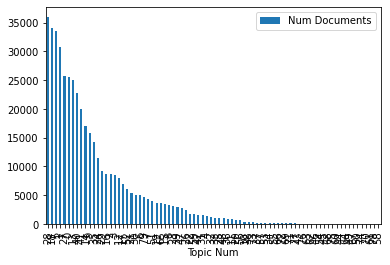

In [112]:
df_topic_distribution.plot.bar(x='Topic Num')

In [39]:
# Styling
#this takes a long time becuase it has to track every row...that is why it is limited to 15 rows...
def color_green(val):
    color = 'blue' if val > .9 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .9 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
#limit to 15 rows
topic_bow_styled = topic_bow.head(15).style.applymap(color_green).applymap(make_bold)
topic_bow_styled

,9,31,51,56,21,34,40,36,43,19,27,30,47,50,45,57,58,39,48,35,1,32,5,4,25,0,17,8,42,18,38,22,24,29,33,44,16,49,10,2,3,6,7,11,12,13,14,15,20,23,26,28,37,41,46,52,53,54,55,59,dominant_topic
0,0.803000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.582000,0.175000,0.108000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.211000,0.284000,0.000000,0.000000,0.442000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.194000,0.644000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.836000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7
6,0.000000,0.000000,0.000000,0.000000,0.143000,0.000000,0.000000,0.000000,0.769000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8
7,0.00

In [113]:
#leave in place and add the columns together
Daddit.reset_index(drop=True, inplace=True)
topic_bow.reset_index(drop=True, inplace=True)
New_MizoFrame = pd.concat([Daddit, topic_bow], axis=1)

In [114]:
New_MizoFrame.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway,50,60,2,54,56,3,59,67,71,23,6,21,33,79,63,25,55,16,58,62,65,74,41,13,70,30,14,68,12,28,35,51,7,15,48,76,45,47,10,43,1,8,0,4,5,9,11,17,18,19,20,22,24,26,27,29,31,32,34,36,37,38,39,40,42,44,46,49,52,53,57,61,64,66,69,72,73,75,77,78,dominant_topic
0,&gt;Be silly once a day\n\nI like this. Nice.,silli day like nice,daddit,Hardwarily,2010-07-17 18:51:04,t3_cqp6w,t1_c0uiar1,t3_cqp6w,3,False,0.45,0.355,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Hmm...\n\nDoes that mean I need to scale back my silliness?,hmm mean need scale back silli,daddit,pigferret,2010-07-17 23:20:38,t3_cqp6w,t1_c0uiswa,t1_c0uiar1,5,False,0.00,0.000,0.24,0.423,0.199,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!",boy luck nice move exampl take moment offer prais shotgun face truli word live,daddit,pigferret,2010-07-17 23:34:23,t3_cqoof,t1_c0uitr7,t3_cqoof,1,False,0.00,0.000,0.00,0.149,0.000,0.321,0.229,0.237,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,"I do this at least once a day, and much more if you count the unintentionals.",least day much count unintent,daddit,MrSpaceYeti,2010-07-17 23:37:24,t3_cqp6w,t1_c0uitxs,t1_c0uiswa,3,False,0.00,0.655,0.00,0.000,0.000,0.000,0.000,0.000,0.182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,I could probably get it down to once a day if I work on it.,could probabl get day work,daddit,pigferret,2010-07-17 23:42:50,t3_cqp6w,t1_c0uiua3,t1_c0uitxs,2,False,0.00,0.835,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [115]:
New_MizoFrame[(New_MizoFrame[16]>0.9) & (New_MizoFrame.body.str.len()>100)].body

1958                                                                                                                                                      We did something similar. My first son has my middle name, which was my grandfather's name as well (though the grandfather was always a bit of dick to me). The second son has my first name as his middle name. My first name was my other grandfather's name (who was a always great).
2036                                                                                                                                                                                                                                                                                           You seem to like A and E. We were thinking of Aeva for our first if it's a she but it just doesn't fit with the surname (also starts with a vowel).
2195                                                                                                                              

In [116]:
Mizo_Dominant = New_MizoFrame[['body','dominant_topic']]
df = KTG_List.copy()
df = df.rename(columns={"Topic Number": "dominant_topic"})
Mizo_Dominant = Mizo_Dominant.join(df['KTG'], on='dominant_topic')

In [117]:
Mizo_Dominant[(Mizo_Dominant['dominant_topic']==0) & (Mizo_Dominant['body'].str.len()>100)]

body  \
14                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Normalizing the scores, so that we can always use 0.9 as the perc...

In [118]:
topic_bow_norm=(topic_bow-topic_bow.mean())/topic_bow.std()

In [119]:
topic_bow_norm['dominant_topic'] = topic_bow_norm.idxmax(axis=1)

In [120]:
#leave in place and add the columns together
Daddit.reset_index(drop=True, inplace=True)
topic_bow_norm.reset_index(drop=True, inplace=True)
New_MizoFrame_norm = pd.concat([Daddit, topic_bow_norm], axis=1)

In [121]:
New_MizoFrame_norm.head()

,body,clean_body,subreddit,author,created_utc,link_id,name,parent_id,score,Throwaway,50,60,2,54,56,3,59,67,71,23,6,21,33,79,63,25,55,16,58,62,65,74,41,13,70,30,14,68,12,28,35,51,7,15,48,76,45,47,10,43,1,8,0,4,5,9,11,17,18,19,20,22,24,26,27,29,31,32,34,36,37,38,39,40,42,44,46,49,52,53,57,61,64,66,69,72,73,75,77,78,dominant_topic
0,&gt;Be silly once a day\n\nI like this. Nice.,silli day like nice,daddit,Hardwarily,2010-07-17 18:51:04,t3_cqp6w,t1_c0uiar1,t3_cqp6w,3,False,3.148642,1.879552,-0.203477,-0.213872,-0.140693,-0.363380,-0.192638,-0.183737,-0.150682,-0.263301,-0.137627,-0.118327,-0.206158,-0.297178,-0.26947,-0.158112,-0.217795,-0.178076,-0.361432,-0.173072,-0.122437,-0.176292,-0.135782,-0.156767,-0.227658,-0.092363,-0.1418,-0.310879,-0.345178,-0.195649,-0.17656,-0.13551,-0.123585,-0.118802,-0.065669,-0.233893,-0.125071,-0.084133,-0.092131,-0.151352,-0.280475,-0.274934,-0.137263,-0.065961,-0.056707,-0.052301,-0.076392,-0.154837,-0.120248,-0.058655,-0.050369,-0.167912,-0.186892,-0.10052,-0.057087,-0.066542,-0.129511,-0.102871,-0.064675,-0.127064,-0.066509,-0.051299,-0.06029,-0.062854,-0.055844,-0.16375,-0.061031,-0.048827,-0.063232,-0.073546,-0.054575,-0.08901,-0.095319,-0.100069,-0.055383,-0.052411,-0.064253,-0.066025,-0.049715,-0.178693,50
1,Hmm...\n\nDoes that mean I need to scale back my silliness?,hmm mean need scale back silli,daddit,pigferret,2010-07-17 23:20:38,t3_cqp6w,t1_c0uiswa,t1_c0uiar1,5,False,-0.278575,-0.323536,2.684463,4.756181,5.128145,-0.363380,-0.192638,-0.183737,-0.150682,-0.263301,-0.137627,-0.118327,-0.206158,-0.297178,-0.26947,-0.158112,-0.217795,-0.178076,-0.361432,-0.173072,-0.122437,-0.176292,-0.135782,-0.156767,-0.227658,-0.092363,-0.1418,-0.310879,-0.345178,-0.195649,-0.17656,-0.13551,-0.123585,-0.118802,-0.065669,-0.233893,-0.125071,-0.084133,-0.092131,-0.151352,-0.280475,-0.274934,-0.137263,-0.065961,-0.056707,-0.052301,-0.076392,-0.154837,-0.120248,-0.058655,-0.050369,-0.167912,-0.186892,-0.10052,-0.057087,-0.066542,-0.129511,-0.102871,-0.064675,-0.127064,-0.066509,-0.051299,-0.06029,-0.062854,-0.055844,-0.16375,-0.061031,-0.048827,-0.063232,-0.073546,-0.054575,-0.08901,-0.095319,-0.100069,-0.055383,-0.052411,-0.064253,-0.066025,-0.049715,-0.178693,56
2,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!",boy luck nice move exampl take moment offer prais shotgun face truli word live,daddit,pigferret,2010-07-17 23:34:23,t3_cqoof,t1_c0uitr7,t3_cqoof,1,False,-0.278575,-0.323536,-0.203477,1.536809,-0.140693,1.577851,3.210132,3.590637,-0.150682,-0.263301,-0.137627,-0.118327,-0.206158,-0.297178,-0.26947,-0.158112,-0.217795,-0.178076,-0.361432,-0.173072,-0.122437,-0.176292,-0.135782,-0.156767,-0.227658,-0.092363,-0.1418,-0.310879,-0.345178,-0.195649,-0.17656,-0.13551,-0.123585,-0.118802,-0.065669,-0.233893,-0.125071,-0.084133,-0.092131,-0.151352,-0.280475,-0.274934,-0.137263,-0.065961,-0.056707,-0.052301,-0.076392,-0.154837,-0.120248,-0.058655,-0.050369,-0.167912,-0.186892,-0.10052,-0.057087,-0.066542,-0.129511,-0.102871,-0.064675,-0.127064,-0.066509,-0.051299,-0.06029,-0.062854,-0.055844,-0.16375,-0.061031,-0.048827,-0.063232,-0.073546,-0.054575,-0.08901,-0.095319,-0.100069,-0.055383,-0.052411,-0.064253,-0.066025,-0.049715,-0.178693,67
3,"I do this at least once a day, and much more if you count the unintentionals.",least day much count unintent,daddit,MrSpaceYeti,2010-07-17 23:37:24,t3_cqp6w,t1_c0uitxs,t1_c0uiswa,3,False,-0.278575,3.741317,-0.203477,-0.213872,-0.140693,-0.363380,-0.192638,-0.183737,3.199321,-0.263301,-0.137627,-0.118327,-0.206158,-0.297178,-0.26947,-0.158112,-0.217795,-0.178076,-0.361432,-0.173072,-0.122437,-0.176292,-0.135782,-0.156767,-0.227658,-0.092363,-0.1418,-0.310879,-0.345178,-0.195649,-0.17656,-0.13551,-0.123585,-0.118802,-0.065669,-0.233893,-0.125071,-0.084133,-0.092131,-0.151352,-0.280475,-0.274934,-0.137263,-0.065961,-0.056707,-0.052301,-0.076392,-0.154837,-0.120248,-0.0

In [128]:
New_MizoFrame_norm[(New_MizoFrame_norm[18]>4) & (New_MizoFrame_norm.body.str.len()>200)].body

1236                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                My son and I love playing with the Monster Jam monster trucks from Hot Wheels, but I've been feeling disappointed with the included cars that you can run over. So I made my own.\n\nDownload and print out these cars and you can smash them over and over,  or print out more. 
1630                                                                                                                                                                                                              

In [123]:
#leave in place and add the columns together
Mizo_Dominant_norm = New_MizoFrame[['body','dominant_topic']]
df = KTG_List.copy()
df = df.rename(columns={"Topic Number": "dominant_topic"})
Mizo_Dominant_norm = Mizo_Dominant_norm.join(df['KTG'], on='dominant_topic')

In [124]:
Mizo_Dominant_norm.head()

,body,dominant_topic,KTG
0,&gt;Be silly once a day\n\nI like this. Nice.,0,"car, seat, drive, rear, back, carseat, safeti, face, belt, front, fit, instal, strap, vehicl, safe, ride, check, sit, use, driver, side, base, child, passeng, forward, infant, accid, put, crash, road, booster, buckl, system, kid, latch, long, seatbelt, leg, one, graco"
1,Hmm...\n\nDoes that mean I need to scale back my silliness?,3,"look, hair, congrat, like, littl, man, babi, dad, beauti, congratul, good, great, cute, e, awesom, daughter, love, girl, ador, one, dude, enjoy, thank, happi, get, eye, got, pictur, face, guy, best, club, pic, well, nice, amaz, head, wow, born, shirt"
2,"&gt; *When the boy lucks into a nice move, for example, take a moment to offer praise before shotgunning him in the face.*\n\nTruly, words to live by!",5,"hardwar, xx, cosbi, dang, dimens, jigsaw, lamin, emo, gatorad, ahhh, thanklove, rowdi, vault, underground, prouder, stormtroop, brewer, bodyweight, sedentari, depot, yeast, dgreat, riff, disengag, faceson, lock, mdf, mermaid, racoon, hyperact, sugar, sham, strip, deadbeat, gun, drill, it, circlejerk, formaldehyd, like"
3,"I do this at least once a day, and much more if you count the unintentionals.",1,"wife, week, babi, hospit, day, get, go, first, birth, littl, time, born, one, good, like, got, doctor, home, nurs, thing, went, hour, us, well, hope, month, c, take, labor, nicu, best, much, section, know, luck, back, realli, everyth, see, feel"
4,I could probably get it down to once a day if I work on it.,1,"wife, week, babi, hospit, day, get, go, first, birth, littl, time, born, one, good, like, got, doctor, home, nurs, thing, went, hour, us, well, hope, month, c, take, labor, nicu, best, much, section, know, luck, back, realli, everyth, see, feel"


Trying Dominant topics after normalization...

In [125]:
df_topic_distribution_norm = topic_bow_norm['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution_norm.columns = ['Topic Num', 'Num Documents']
df = KTG_List.copy()
df_topic_distribution_norm = df_topic_distribution_norm.join(df['KTG'], on='Topic Num')
df_topic_distribution_norm.head()

,Topic Num,Num Documents,KTG
0,12,21731,"feel, like, know, thing, one, get, go, wife, time, love, think, life, make, kid, want, say, year, would, son, realli, way, first, even, tri, never, good, dad, littl, man, much, help, daughter, happen, child, hope, tell, still, need, talk, thought"
1,60,18540,"time, day, kid, get, work, home, go, year, make, like, month, wife, one, dad, love, much, take, thing, week, old, feel, son, want, good, everi, first, realli, start, daughter, littl, see, life, job, come, two, even, still, stay, back, know"
2,3,18284,"look, hair, congrat, like, littl, man, babi, dad, beauti, congratul, good, great, cute, e, awesom, daughter, love, girl, ador, one, dude, enjoy, thank, happi, get, eye, got, pictur, face, guy, best, club, pic, well, nice, amaz, head, wow, born, shirt"
3,79,17847,"get, babi, time, sleep, help, go, work, wife, thing, month, take, like, need, first, tri, night, day, hour, make, realli, week, feel, much, start, one, better, also, good, lot, chang, feed, cri, know, want, would, littl, everi, keep, give, way"
4,58,16653,"old, month, year, littl, one, daughter, son, like, love, first, girl, boy, got, get, look, birthday, start, two, babi, time, turn, day, twin, kid, week, wait, big, mine, go, cute, last, still, brother, awesom, pictur, ago, happi, man, think, well"


In [126]:
df_topic_distribution_norm.head(15)

,Topic Num,Num Documents,KTG
0,12,21731,"feel, like, know, thing, one, get, go, wife, time, love, think, life, make, kid, want, say, year, would, son, realli, way, first, even, tri, never, good, dad, littl, man, much, help, daughter, happen, child, hope, tell, still, need, talk, thought"
1,60,18540,"time, day, kid, get, work, home, go, year, make, like, month, wife, one, dad, love, much, take, thing, week, old, feel, son, want, good, everi, first, realli, start, daughter, littl, see, life, job, come, two, even, still, stay, back, know"
2,3,18284,"look, hair, congrat, like, littl, man, babi, dad, beauti, congratul, good, great, cute, e, awesom, daughter, love, girl, ador, one, dude, enjoy, thank, happi, get, eye, got, pictur, face, guy, best, club, pic, well, nice, amaz, head, wow, born, shirt"
3,79,17847,"get, babi, time, sleep, help, go, work, wife, thing, month, take, like, need, first, tri, night, day, hour, make, realli, week, feel, much, start, one, better, also, good, lot, chang, feed, cri, know, want, would, littl, everi, keep, give, way"
4,58,16653,"old, month, year, littl, one, daughter, son, like, love, first, girl, boy, got, get, look, birthday, start, two, babi, time, turn, day, twin, kid, week, wait, big, mine, go, cute, last, still, brother, awesom, pictur, ago, happi, man, think, well"
5,68,16239,"would, need, go, thing, want, get, like, make, know, kid, child, think, time, parent, help, peopl, may, way, one, good, work, talk, someth, say, take, also, could, even, sure, might, tri, children, situat, issu, see, famili, wife, problem, person, realli"
6,1,16047,"wife, week, babi, hospit, day, get, go, first, birth, littl, time, born, one, good, like, got, doctor, home, nurs, thing, went, hour, us, well, hope, month, c, take, labor, nicu, best, much, section, know, luck, back, realli, everyth, see, feel"
7,8,14494,"sleep, night, bed, get, cri, time, month, wake, old, back, like, put, asleep, one, go, room, would, crib, hour, minut, kid, nap, babi, fall, start, us, still, around, tri, use, daughter, let, work, everi, littl, son, slept, got, day, wife"
8,50,13626,"kid, like, get, think, thing, one, would, go, make, year, peopl, old, parent, say, want, time, know, good, daughter, see, realli, look, way, someth, play, son, also, littl, love, even, much, let, never, got, around, actual, use, dad, right, lot"
9,63,12697,"dad, mom, wife, father, men, like, women, parent, peopl, kid, think, get, say, mother, take, time, would, want, care, husband, one, chang, work, go, famili, know, make, home, woman, daughter, thing, way, need, feel, see, even, ask, fuck, guy, stay"


In [127]:
df_topic_distribution_norm.to_csv('dominant_topics_80.csv')

Renaming columns...

In [8]:
body_list = Daddit[Daddit.body.str.contains(r'(?:\s|^)mee(?:\s|$)')].body

In [10]:
abbr = 'NFL'

item = abbr + '$' 

Daddit[Daddit['body'].str.match(item)]

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,gilded,link_id,name,parent_id,removal_reason,score,score_hidden,subreddit,ups,Throwaway_User,Throwaway_Body,Throwaway,clean_body,Picky_Eaters,Sleep_Training,Nursing,Dad_Support,Parenting_Jokes,Topic_5,Smoke_Drugs_Alcohol,Topic_7,College,Grandparents,Naked_Privacy,Allergy_Sick_Runny_Nose,Child_Food,Parenting_Groups_Religious,Father_Role,Toys_Playing,Diapers,Topic_17,After_First_Child,Child_Activity,Baby_Gear,Psych_Stress,Parent_Gear,Child_Autonomy_Str_Danger,Circumcision,Hair_Care,Vaccines,Teen_Changes,BabyProof_Accidents,Swimming,Moderator,School,Male_Norms,Birth,Joke,Dogs,Diagnosing_Disorders,Cost_Financial_Planning,Topic_38,Topic_39,Children_Socializing,Santa,Work_Parenting_Schedule,Topic_43,Religious_Social_Beleifs,CPS_Child_Abuse,Bathtime_Sleep_Routine,Media,Tantrum_Mngmnt_Discipline,Topic 49,Topic 50,Topic 51,Puppy,Topic_53,Parenting_Pregnany_Hardships_Experiences,Potty_Training,Language_Reading,Music,Edu_Phil,Congrats,Challenging_Behavior,Managing_Grief_Unexpected_Pregnancy,Doors_Child Accidents,Topic_63,Family_Car,Bully,Thanks_Support,Parenting_Nature,Skin_Care_Cloth,Child_Support_CPS


In [143]:
#renaming columns after discovering the nature of topics
column_indices = topic_bow.columns
new_names = ['Topic_'+ str(i) for i in optimal_model.num_topics]
old_names = topic_bow[column_indices]
topic_bow.rename(columns=dict(zip(old_names, new_names)), inplace=True)

TypeError: 'int' object is not iterable

testing different topics

In [178]:
df.columns

Index(['archived', 'author', 'author_flair_css_class', 'author_flair_text',
       'body', 'controversiality', 'created_utc', 'distinguished', 'downs',
       'edited', 'gilded', 'link_id', 'name', 'parent_id', 'removal_reason',
       'score', 'score_hidden', 'subreddit', 'ups', 'Throwaway_User',
       'Throwaway_Body', 'Throwaway', 'clean_body', 'Picky_Eaters',
       'Sleep_Training', 'Nursing', 'Dad_Support', 'Parenting_Jokes',
       'Topic_5', 'Smoke_Drugs_Alcohol', 'Topic_7', 'College', 'Grandparents',
       'Naked_Privacy', 'Allergy_Sick_Runny_Nose', 'Child_Food',
       'Parenting_Groups_Religious', 'Father_Role', 'Toys_Playing', 'Diapers',
       'Topic_17', 'After_First_Child', 'Child_Activity', 'Baby_Gear',
       'Psych_Stress', 'Parent_Gear', 'Child_Autonomy_Str_Danger',
       'Circumcision', 'Hair_Care', 'Vaccines', 'Teen_Changes',
       'BabyProof_Accidents', 'Swimming', 'Moderator', 'School', 'Male_Norms',
       'Birth', 'Joke', 'Dogs', 'Diagnosing_Disorders',
   

In [324]:
df[(df['Santa']>0.80) & (df.body.str.len()>300)].body

47                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [248]:
optimal_LDA_model.num_topics

40

In [251]:
#load LDA model
from gensim.models import LdaModel
from gensim import corpora, models
from gensim.corpora import Dictionary
optimal_model = LdaModel.load('LDA_Model_70.model')
dictionary = corpora.Dictionary.load('DadditDictionary.dict')
corpus = corpora.MmCorpus('DadditCorpusFinal.mm')

In [290]:
Minimized=['Picky_Eaters','Sleep_Training', 'Nursing', 'Dad_Support', 'Parenting_Jokes',
       'Smoke_Drugs_Alcohol','College', 'Grandparents',
       'Naked_Privacy', 'Allergy_Sick_Runny_Nose', 'Child_Food',
       'Parenting_Groups_Religious', 'Father_Role', 'Toys_Playing', 'Diapers',
       'After_First_Child', 'Child_Activity', 'Baby_Gear',
       'Psych_Stress', 'Parent_Gear', 'Child_Autonomy_Str_Danger',
       'Circumcision', 'Hair_Care', 'Vaccines', 'Teen_Changes',
       'BabyProof_Accidents', 'Swimming', 'Moderator', 'School', 'Male_Norms',
       'Birth', 'Joke', 'Dogs', 'Diagnosing_Disorders',
       'Cost_Financial_Planning', 'Children_Socializing', 'Santa', 'Work_Parenting_Schedule', 
       'Religious_Social_Beleifs', 'CPS_Child_Abuse', 'Bathtime_Sleep_Routine',
       'Media', 'Tantrum_Mngmnt_Discipline','Puppy', 
       'Parenting_Pregnany_Hardships_Experiences', 'Potty_Training',
       'Language_Reading', 'Music', 'Edu_Phil', 'Congrats',
       'Challenging_Behavior', 'Managing_Grief_Unexpected_Pregnancy',
       'Doors_Child Accidents','Family_Car', 'Bully',
       'Thanks_Support', 'Parenting_Nature', 'Skin_Care_Cloth',
       'Child_Support_CPS']

In [291]:
df_Minimized = df[Minimized]

In [292]:
corrMatrix = df_Minimized.corr()
print (corrMatrix)

                                          Picky_Eaters  Sleep_Training  \
Picky_Eaters                                  1.000000       -0.023770   
Sleep_Training                               -0.023770        1.000000   
Nursing                                      -0.010027       -0.012294   
Dad_Support                                  -0.000504       -0.009941   
Parenting_Jokes                              -0.000605       -0.009474   
Smoke_Drugs_Alcohol                          -0.006234       -0.013724   
College                                      -0.002748       -0.008832   
Grandparents                                 -0.008891       -0.021171   
Naked_Privacy                                -0.010076       -0.018740   
Allergy_Sick_Runny_Nose                      -0.012730       -0.024376   
Child_Food                                    0.019074       -0.037390   
Parenting_Groups_Religious                   -0.016890       -0.035375   
Father_Role                           

In [293]:
import seaborn as sn
import matplotlib.pyplot as plt

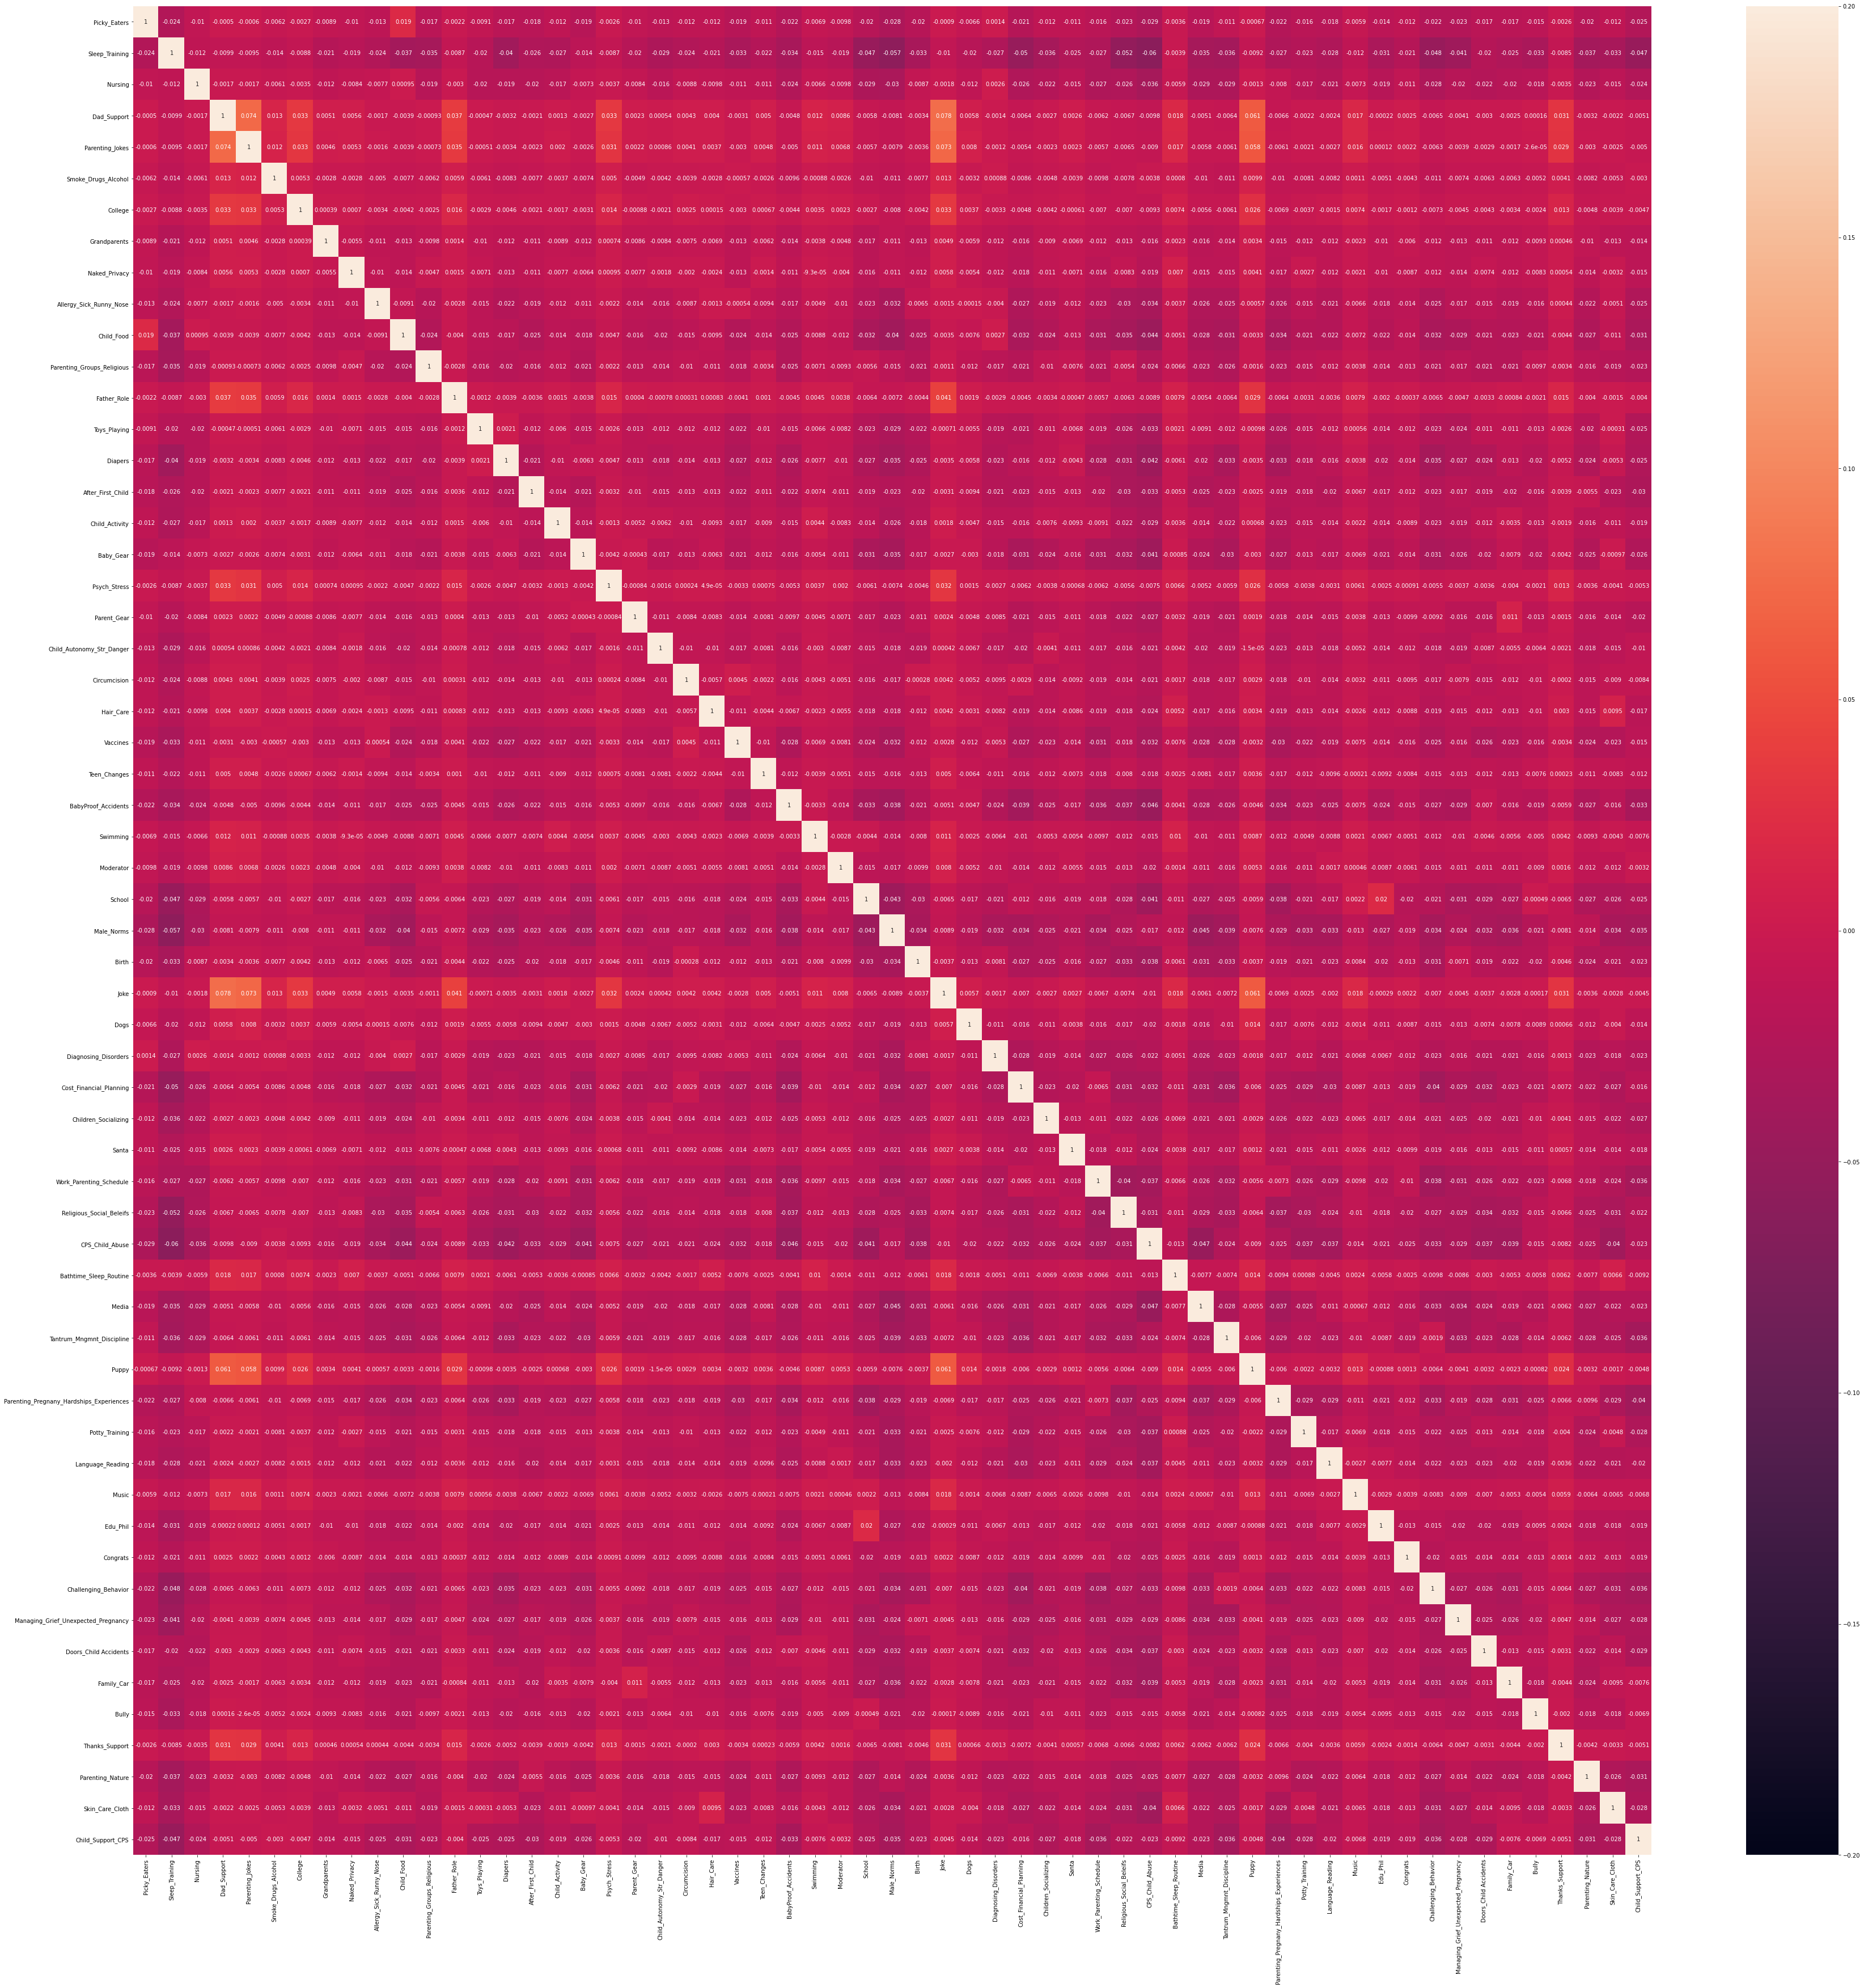

In [298]:
plt.figure(figsize=(60, 60))
sn.heatmap(corrMatrix,annot=True, vmin=-0.2 , vmax=0.2)
plt.show()